<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview
This notebook contains the step by step approach undertaken to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores; a large Ecuadorian-based grocery retailer.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# pip install pandas
# pip install numpy 
# pip install matplotlib
# pip install seaborn 
# pip install forex_python
# pip install babel 
# pip install seaborn
# pip install pandas-profiling 

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [187]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode
from scipy.stats import ttest_ind
from scipy.stats import skew


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import plot
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import sweetviz as sv

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import chi2_contingency

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score,roc_curve, auc,roc_auc_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
import joblib
from sklearn.pipeline import Pipeline
import pickle
# Other packages
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
holidaysurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/holidays_events.csv"
oilurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/oil.csv"
storesurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/stores.csv"
testurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/test.csv"
trainurl="https://github.com/Gilbert-B/Regression-Project/releases/download/data/train.csv"
transactionsurl="https://raw.githubusercontent.com/Gilbert-B/Regression-Project/main/data/transactions.csv"

In [4]:
test_df = pd.read_csv(testurl,error_bad_lines=False)
train_df= pd.read_csv(trainurl,error_bad_lines=False)
holidays_df= pd.read_csv(holidaysurl,error_bad_lines=False)
transaction_df= pd.read_csv(transactionsurl,error_bad_lines=False)
stores_df= pd.read_csv(storesurl,error_bad_lines=False)
oil_df= pd.read_csv(oilurl,error_bad_lines=False)

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

### Test Data Set

In [5]:
# A quick look at the shape of our test dataset

test_df.shape

(28512, 5)

In [6]:
#Looking at the head and tail of our dataset

test_df.head()

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

In [7]:
test_df.tail()

id        date  store_nbr                      family  onpromotion
28507  3029395  2017-08-31          9                     POULTRY            1
28508  3029396  2017-08-31          9              PREPARED FOODS            0
28509  3029397  2017-08-31          9                     PRODUCE            1
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399  2017-08-31          9                     SEAFOOD            0

In [8]:
#Look at the columns in the test dataset and their data types

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [9]:
#Get more details about the features of our data
test_df.describe()

id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.029399e+06     54.000000    646.000000

In [10]:
#Check for missing values
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

<AxesSubplot: >

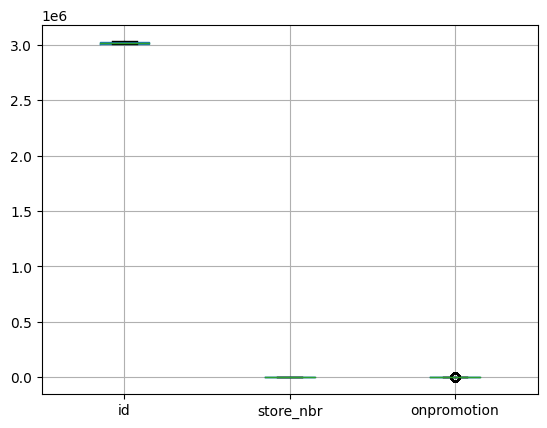

In [11]:
#Check for outliers
test_df.boxplot()

### Train Data Set

In [12]:
# A quick look at the shape of our train dataset

train_df.shape

(3000888, 6)

In [13]:
#Looking at the head and tail of our dataset

train_df.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [14]:
train_df.tail()

id        date  store_nbr                      family     sales  \
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0

In [15]:
#Look at the columns in the test dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [16]:
#Get more details about the features of our data
train_df.describe()

id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

In [17]:
#Check for missing values
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

<AxesSubplot: >

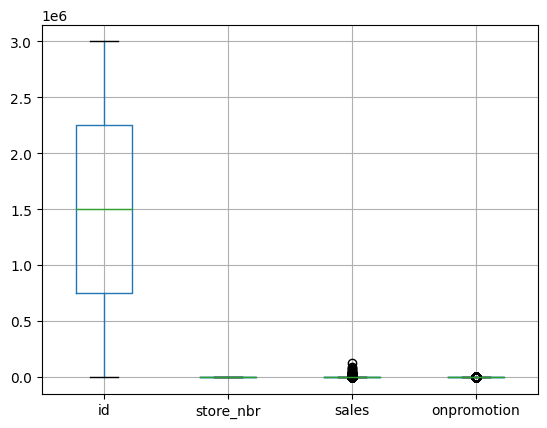

In [18]:
#Check for outliers
train_df.boxplot()

### Holidays Data Set

In [19]:
# A quick look at the shape of our holiday dataset

holidays_df.shape

(350, 6)

In [20]:
#Looking at the head and tail of our dataset

holidays_df.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [21]:
holidays_df.tail()

date        type    locale locale_name description  transferred
345  2017-12-22  Additional  National     Ecuador   Navidad-3        False
346  2017-12-23  Additional  National     Ecuador   Navidad-2        False
347  2017-12-24  Additional  National     Ecuador   Navidad-1        False
348  2017-12-25     Holiday  National     Ecuador     Navidad        False
349  2017-12-26  Additional  National     Ecuador   Navidad+1        False

In [22]:
#Look at the columns in the holidays dataset and their data types

holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [23]:
#Get more details about the features of our data
holidays_df.describe()

date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338

In [24]:
#Check for missing values
holidays_df.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

<AxesSubplot: >

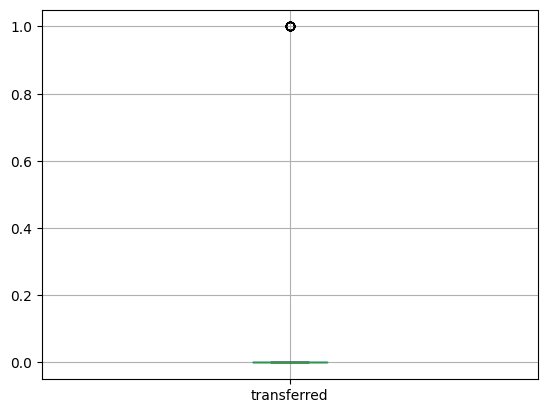

In [25]:
#Check for outliers
holidays_df.boxplot()

### Transactions Data Set

In [26]:
# A quick look at the shape of our transactions dataset

transaction_df.shape

(83488, 3)

In [27]:
#Looking at the head and tail of our dataset

transaction_df.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [28]:
transaction_df.tail()

date  store_nbr  transactions
83483  2017-08-15         50          2804
83484  2017-08-15         51          1573
83485  2017-08-15         52          2255
83486  2017-08-15         53           932
83487  2017-08-15         54           802

In [29]:
#Look at the columns in the transactionss dataset and their data types

transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [30]:
#Get more details about the features of our data
transaction_df.describe()

store_nbr  transactions
count  83488.000000  83488.000000
mean      26.939237   1694.602158
std       15.608204    963.286644
min        1.000000      5.000000
25%       13.000000   1046.000000
50%       27.000000   1393.000000
75%       40.000000   2079.000000
max       54.000000   8359.000000

In [31]:
#Check for missing values
transaction_df.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

<AxesSubplot: >

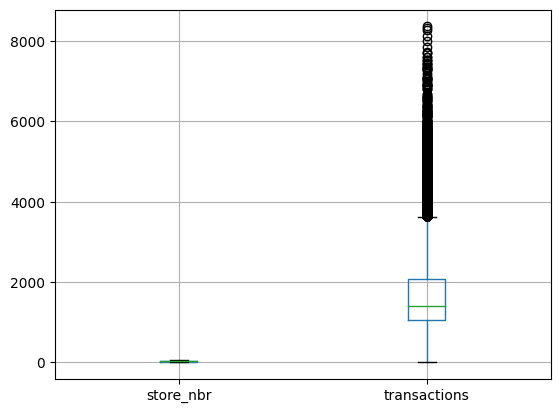

In [32]:
#Check for outliers
transaction_df.boxplot()

### Oil Data Set

In [33]:
# A quick look at the shape of our oil dataset

oil_df.shape

(1218, 2)

In [34]:
#Looking at the head and tail of our dataset
oil_df.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [35]:
oil_df.tail()

date  dcoilwtico
1213  2017-08-25       47.65
1214  2017-08-28       46.40
1215  2017-08-29       46.46
1216  2017-08-30       45.96
1217  2017-08-31       47.26

In [36]:
#Look at the columns in the oil dataset and their data types

oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [37]:
#Get more details about the features of our data
oil_df.describe()

dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000

In [38]:
#Check for missing values
oil_df.isna().sum()

date           0
dcoilwtico    43
dtype: int64

<AxesSubplot: >

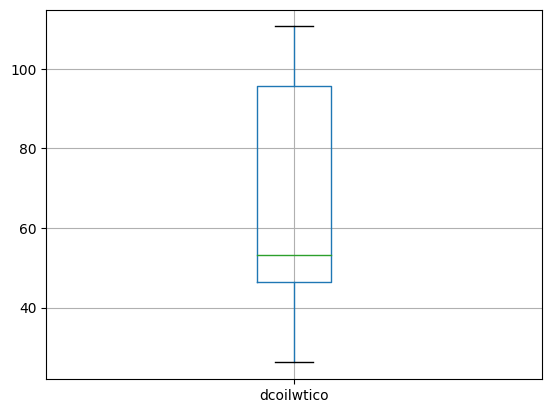

In [39]:
#Check for outliers
oil_df.boxplot()

### Stores Dataset

In [40]:
# A quick look at the shape of our stores dataset

stores_df.shape

(54, 5)

In [41]:
#Looking at the head and tail of our dataset
stores_df.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [42]:
stores_df.tail()

store_nbr       city       state type  cluster
49         50     Ambato  Tungurahua    A       14
50         51  Guayaquil      Guayas    A       17
51         52      Manta      Manabi    A       11
52         53      Manta      Manabi    D       13
53         54  El Carmen      Manabi    C        3

In [43]:
#Look at the columns in the stores dataset and their data types

stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [44]:
#Get more details about the features of our data
stores_df.describe()

store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000

In [45]:
#Check for missing values
stores_df.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

<AxesSubplot: >

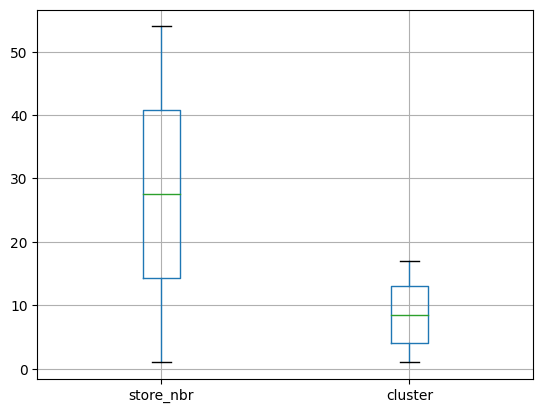

In [46]:
#Check for outliers
stores_df.boxplot()

## Questions 

Is the train dataset complete (has all the required dates)?

Which dates have the lowest and highest sales for each year?

Did the earthquake impact sales?

Are certain groups of stores selling more products? (Cluster, city, state, type)

Are sales affected by promotions, oil prices and holidays?

What analysis can we get from the date and its extractable features?


# Hypothesis

NULL: There is no significant increase in sales when product-family are on promotion

Alternate: There is a significant increase in sales when products are on promotion

# Issues with the data

1. Oil data has some missing values 
2. The whole data set need to be combined into one file 

# How to handle the issues

1. Deal with missing data by repplace all nullvalues with the mean value 
2. Combine the data sets to get a a single data set for analysis 

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

### Drop Duplicates

In [47]:
# Use pandas.DataFrame.drop_duplicates method
train_df.duplicated().any(), 
stores_df.duplicated().any(), 
oil_df.duplicated().any(),  
test_df.duplicated().any(),  
holidays_df.duplicated().any() 

False

There arent any duplicates

### Impute Missing Values 

From our data viewing we find out that some of the values missing in our oil datset 

In [48]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date           0
dcoilwtico    43
dtype: int64

In [49]:
#Filling missing values in oil data with the the value before that missing data
oil_df = oil_df.bfill()

In [50]:
#checking missing values
null_values=pd.isnull(oil_df).sum()
null_values

date          0
dcoilwtico    0
dtype: int64

Missing Values have been dealt

### New Features Creation

In [51]:
#create a new column known as day which is the same as the date column
#The new column would help in extracting date information instead of always re-indexing 

train_df['day'] = train_df['date']
test_df['day'] = test_df['date']

In [52]:
train_df.head()

id        date  store_nbr      family  sales  onpromotion         day
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  2013-01-01
1   1  2013-01-01          1   BABY CARE    0.0            0  2013-01-01
2   2  2013-01-01          1      BEAUTY    0.0            0  2013-01-01
3   3  2013-01-01          1   BEVERAGES    0.0            0  2013-01-01
4   4  2013-01-01          1       BOOKS    0.0            0  2013-01-01

In [57]:
#Convert date column to datetime attribute for each dataset with date column 

train_df["date"] = pd.to_datetime(train_df["date"], format='%Y-%m-%d')
transaction_df["date"] = pd.to_datetime(transaction_df["date"], format='%Y-%m-%d')
oil_df["date"] = pd.to_datetime(oil_df["date"], format='%Y-%m-%d')
holidays_df["date"] = pd.to_datetime(holidays_df["date"], format='%Y-%m-%d')

test_df["date"] = pd.to_datetime(test_df["date"], format='%Y-%m-%d')

In [59]:
#Merge all the dataset
merged_df = pd.merge(train_df, stores_df, on='store_nbr', how='left')
merged_df = pd.merge(merged_df,transaction_df, on=['store_nbr','date'], how='left')
merged_df = pd.merge(merged_df,oil_df, on=['date'], how='left')
merged_df = pd.merge(merged_df,holidays_df, on=['date'], how='left')

In [60]:
#Check for missing values after the merge 
merged_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
day                   0
city                  0
state                 0
type_x                0
cluster               0
transactions     249117
dcoilwtico       878526
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

For the numerical data we use the bfil method to impute the missing values.That is filling missing values with the available previous values 

In [61]:
 #Filling the missing data in the transaction and dcoilwtico using the Backfill method
merged_df["transactions"].fillna(method='bfill', inplace=True)

merged_df["dcoilwtico"].fillna(method='bfill', inplace=True)

For categorical attributes, we use the mode representation for the missing values.

In [62]:
# Find the mode of the 'type_y' column
mode = merged_df['type_y'].mode()[0]

# Replace missing values in the 'type_y' column with the mode
merged_df['type_y'].fillna(mode, inplace=True)

In [63]:
# Find the mode of the 'locale' column
mode = merged_df['locale'].mode()[0]

# Replace missing values in the 'locale' column with the mode
merged_df['locale'].fillna(mode, inplace=True)

In [64]:
# Find the mode of the 'description' column
mode = merged_df['description'].mode()[0]

# Replace missing values in the 'description' column with the mode
merged_df['description'].fillna(mode, inplace=True)

In [65]:
# Find the mode of the 'description' column
mode = merged_df['description'].mode()[0]

# Replace missing values in the 'description' column with the mode
merged_df['description'].fillna(mode, inplace=True)

In [66]:
# Find the mode of the 'locale_name' column
mode = merged_df['locale_name'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['locale_name'].fillna(mode, inplace=True)

In [67]:
# Find the mode of the 'transferred' column
mode = merged_df['transferred'].mode()[0]

# Replace missing values in the 'locale_name' column with the mode
merged_df['transferred'].fillna(mode, inplace=True)

In [68]:
#Lets confirm if all mssing values have been cleared 
merged_df.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
day             0
city            0
state           0
type_x          0
cluster         0
transactions    0
dcoilwtico      0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

In [69]:
#Set date column as index

merged_df = merged_df.set_index('date')

In [70]:
#rename columns for consistency and easy identification. 

merged_df.rename(columns = {'type_x':'Store_type'}, inplace = True)
merged_df.rename(columns = {'type_y':'Holiday_type'}, inplace = True)

In [71]:
# A look at the columns in our mergesd data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   day           object 
 6   city          object 
 7   state         object 
 8   Store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  Holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   bool   
dtypes: bool(1), float64(3), int64(4), object(9)
memory usage: 399.1+ MB


In [73]:
#Generate some basic statistical information about our merged dataset. 
merged_df.describe()

id     store_nbr         sales   onpromotion       cluster  \
count  3.054348e+06  3.054348e+06  3.054348e+06  3.054348e+06  3.054348e+06   
mean   1.504277e+06  2.750000e+01  3.590209e+02  2.617480e+00  8.481481e+00   
std    8.662610e+05  1.558579e+01  1.107286e+03  1.225494e+01  4.649735e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    7.546768e+05  1.400000e+01  0.000000e+00  0.000000e+00  4.000000e+00   
50%    1.507572e+06  2.750000e+01  1.100000e+01  0.000000e+00  8.500000e+00   
75%    2.255120e+06  4.100000e+01  1.960110e+02  0.000000e+00  1.300000e+01   
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02  1.700000e+01   

       transactions    dcoilwtico  
count  3.054348e+06  3.054348e+06  
mean   1.664934e+03  6.778930e+01  
std    9.557386e+02  2.570258e+01  
min    5.000000e+00  2.619000e+01  
25%    1.032000e+03  4.628000e+01  
50%    1.357000e+03  5.319000e+01  
75%    2.027250e+03  9.580000e+01  
max    8.359000e+03  1.106200e+02

In [76]:
'''#The merged dataset is then analyzed further using sweetviz

# Generate the report
report = sv.analyze(merged_df)

# Visualize the report
report.show_html('report_merged_df.html', open_browser=True)

#The visualization will be displayed on a differet page of the browser. the visualization is highly interactive.'''

                                             |                                             | [  0%]   00:00 ->…

Report report_merged_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [78]:
#Create new attributes 'Year', 'Month' and 'Weekday Name'

merged_df['Year'] = merged_df.index.year
merged_df['Month'] = merged_df.index.month_name()
merged_df['Weekday_Name'] = merged_df.index.day_name()

In [79]:
#Change data attribute to datetime for consistency 
merged_df["day"] = pd.to_datetime(merged_df["day"], format='%Y-%m-%d')

In [80]:
# A look at the final df which will be used for analysis and modelling 
merged_df.head()

id  store_nbr      family  sales  onpromotion        day   city  \
date                                                                          
2013-01-01   0          1  AUTOMOTIVE    0.0            0 2013-01-01  Quito   
2013-01-01   1          1   BABY CARE    0.0            0 2013-01-01  Quito   
2013-01-01   2          1      BEAUTY    0.0            0 2013-01-01  Quito   
2013-01-01   3          1   BEVERAGES    0.0            0 2013-01-01  Quito   
2013-01-01   4          1       BOOKS    0.0            0 2013-01-01  Quito   

                state Store_type  cluster  transactions  dcoilwtico  \
date                                                                  
2013-01-01  Pichincha          D       13         770.0       93.14   
2013-01-01  Pichincha          D       13         770.0       93.14   
2013-01-01  Pichincha          D       13         770.0       93.14   
2013-01-01  Pichincha          D       13         770.0       93.14   
2013-01-01  Pichincha          D       13         770.0       93.14   

           Holiday_type    locale locale_name         description  \
date                                                                
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   
2013-01-01      Holiday  National     Ecuador  Primer dia del ano   

            transferred  Year    Month Weekday_Name  
date                                                 
2013-01-01        False  2013  January      Tuesday  
2013-01-01        False  2013  January      Tuesday  
2013-01-01        False  2013  January      Tuesday  
2013-01-01        False  2013  January      Tuesday  
2013-01-01        False  2013  January      Tuesday

## Univariate Analysis 

In univariate analysis, statistical measures like mean, median, mode, standard deviation, and range are used to describe the data. It is often used to explore the data and gain an understanding of the underlying characteristics of a variable before performing more complex analyses.


##### Family

In [82]:
# Get descriptive statistics for the family attribute
family_desc = merged_df["family"].describe()

family_desc

count        3054348
unique            33
top       AUTOMOTIVE
freq           92556
Name: family, dtype: object

In [83]:
merged_df["family"].value_counts(normalize=True) * 100

AUTOMOTIVE                    3.030303
HOME APPLIANCES               3.030303
SCHOOL AND OFFICE SUPPLIES    3.030303
PRODUCE                       3.030303
PREPARED FOODS                3.030303
POULTRY                       3.030303
PLAYERS AND ELECTRONICS       3.030303
PET SUPPLIES                  3.030303
PERSONAL CARE                 3.030303
MEATS                         3.030303
MAGAZINES                     3.030303
LIQUOR,WINE,BEER              3.030303
LINGERIE                      3.030303
LAWN AND GARDEN               3.030303
LADIESWEAR                    3.030303
HOME CARE                     3.030303
HOME AND KITCHEN II           3.030303
BABY CARE                     3.030303
HOME AND KITCHEN I            3.030303
HARDWARE                      3.030303
GROCERY II                    3.030303
GROCERY I                     3.030303
FROZEN FOODS                  3.030303
EGGS                          3.030303
DELI                          3.030303
DAIRY                    

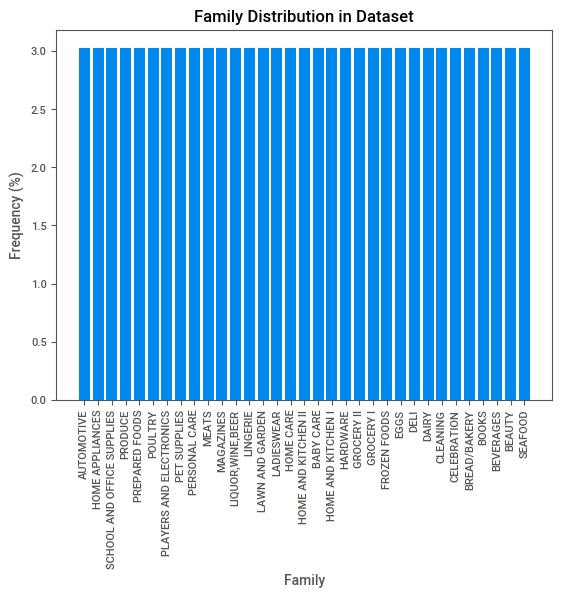

In [84]:
# Get the frequency of each family 
family_freq = merged_df["family"].value_counts(normalize=True) * 100

# Create a bar chart
plt.bar(family_freq.index, family_freq.values)

# Set the title and axis labels
plt.title("Family Distribution in Dataset")
plt.xlabel("Family")
plt.ylabel("Frequency (%)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


##### City

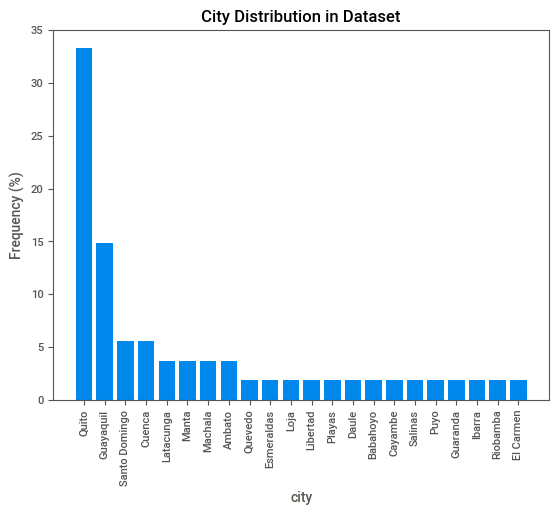

In [85]:
# Get the frequency of each city as a pandas Series

city_freq = merged_df["city"].value_counts(normalize=True) * 100

# Create a bar chart
plt.bar(city_freq.index, city_freq.values)

# Set the title and axis labels
plt.title("City Distribution in Dataset")
plt.xlabel("city")
plt.ylabel("Frequency (%)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### State

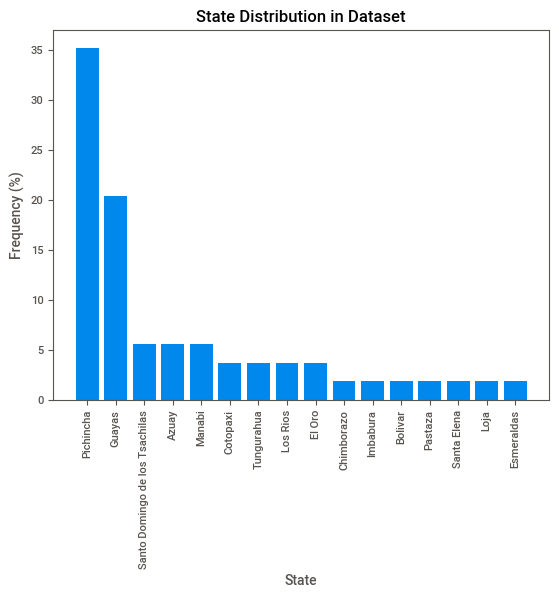

In [87]:
# Get the frequency of each family as a pandas Series
state_freq = merged_df["state"].value_counts(normalize=True) * 100

# Create a bar chart
plt.bar(state_freq.index, state_freq.values)

# Set the title and axis labels
plt.title("State Distribution in Dataset")
plt.xlabel("State")
plt.ylabel("Frequency (%)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### Store Type

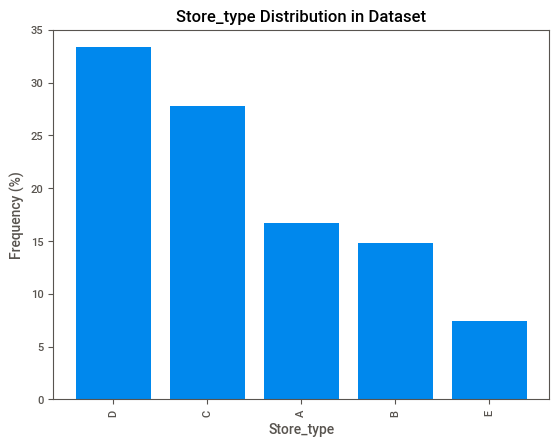

In [88]:
# Get the frequency of each family as a pandas Series
Store_type_freq = merged_df["Store_type"].value_counts(normalize=True) * 100

# Create a bar chart
plt.bar(Store_type_freq.index, Store_type_freq.values)

# Set the title and axis labels
plt.title("Store_type Distribution in Dataset")
plt.xlabel("Store_type")
plt.ylabel("Frequency (%)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### Cluster 

In [89]:
#normalize cluster
merged_df["cluster"].value_counts(normalize=True) 

3     0.129630
10    0.111111
6     0.111111
15    0.092593
13    0.074074
14    0.074074
11    0.055556
4     0.055556
8     0.055556
1     0.055556
9     0.037037
2     0.037037
7     0.037037
16    0.018519
5     0.018519
12    0.018519
17    0.018519
Name: cluster, dtype: float64

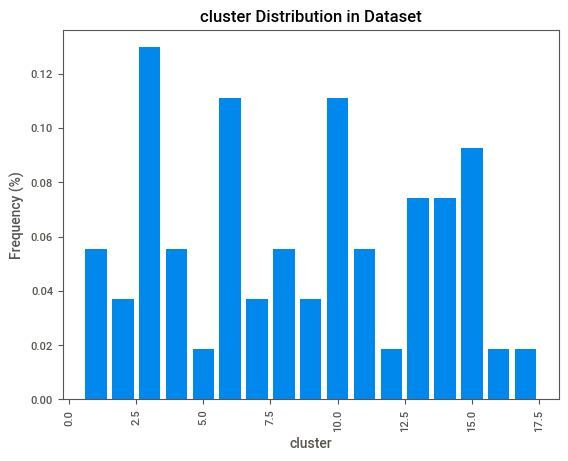

In [90]:
# Get the frequency of each family as a pandas Series
cluster_freq = merged_df["cluster"].value_counts(normalize=True) 

# Create a bar chart
plt.bar(cluster_freq.index, cluster_freq.values)

# Set the title and axis labels
plt.title("cluster Distribution in Dataset")
plt.xlabel("cluster")
plt.ylabel("Frequency (%)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### Transactions

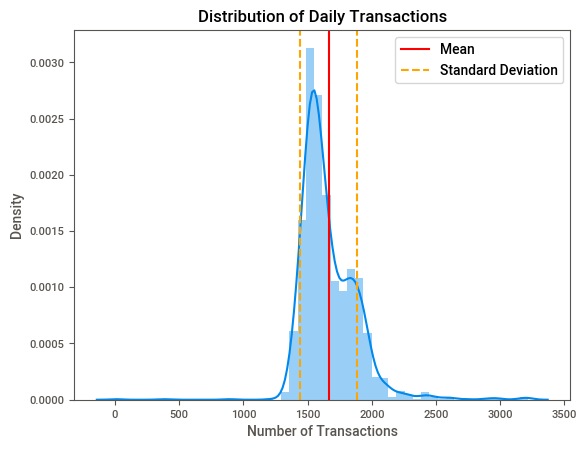

Mean:  1663.3355274705984
Standard Deviation:  223.76190104190667
Skewness:  1.6207754360916253


In [92]:
# Resample the "transactions" column to get the daily mean
transaction_daily = merged_df['transactions'].resample('D').mean().fillna(method='bfill')

# Convert the Series to a numpy array
transaction_daily_array = np.array(transaction_daily)

# Calculate the mean and standard deviation of the dcoilwtico
mean_transaction = np.mean(transaction_daily_array)
std_transaction = np.std(transaction_daily_array)

# Calculate the skewness of the daily sales
skew_transaction = skew(transaction_daily_array)

# Create a KDE plot of the daily transactions
sns.distplot(transaction_daily_array)

# Set the title and axis labels
plt.title("Distribution of Daily Transactions")
plt.xlabel("Number of Transactions")

# Add the mean and standard deviation to the plot
plt.axvline(mean_transaction, color='red', label='Mean')
plt.axvline(mean_transaction - std_transaction, color='orange', linestyle='--', label='Standard Deviation')
plt.axvline(mean_transaction + std_transaction, color='orange', linestyle='--')
plt.legend()

# Display the plot
plt.show()

# Print the mean, standard deviation, and skewness of the daily transaction 
print("Mean: ", mean_transaction)
print("Standard Deviation: ", std_transaction)
print("Skewness: ", skew_transaction)

##### Oil

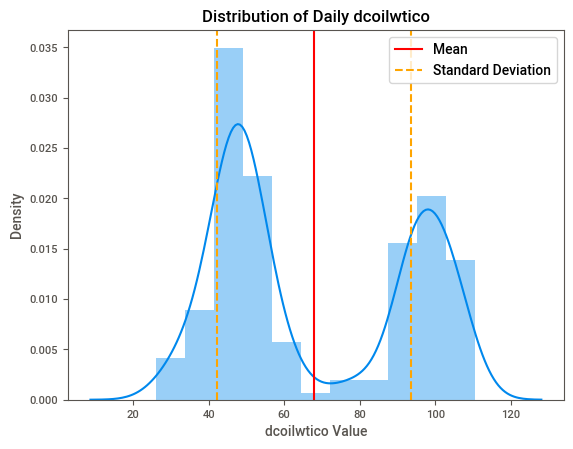

Mean:  67.84527843601896
Standard Deviation:  25.70113991272505
Skewness:  0.30723014182079894


In [93]:
# Resample the "dcoilwtico" column to get the daily mean
dcoilwtico_daily = merged_df['dcoilwtico'].resample('D').mean().fillna(method='bfill')

# Convert the Series to a numpy array
dcoilwtico_daily_array = np.array(dcoilwtico_daily)

# Calculate the mean and standard deviation of the dcoilwtico
mean_dcoilwtico = np.mean(dcoilwtico_daily_array)
std_dcoilwtico = np.std(dcoilwtico_daily_array)

# Calculate the skewness of the daily sales
skew_dcoilwtico = skew(dcoilwtico_daily_array)

# Create a KDE plot of the daily transactions
sns.distplot(dcoilwtico_daily_array)

# Set the title and axis labels
plt.title("Distribution of Daily dcoilwtico")
plt.xlabel("dcoilwtico Value")

# Add the mean and standard deviation to the plot
plt.axvline(mean_dcoilwtico, color='red', label='Mean')
plt.axvline(mean_dcoilwtico - std_dcoilwtico, color='orange', linestyle='--', label='Standard Deviation')
plt.axvline(mean_dcoilwtico + std_dcoilwtico, color='orange', linestyle='--')
plt.legend()

# Display the plot
plt.show()

# Print the mean, standard deviation, and skewness of the daily sales
print("Mean: ", mean_dcoilwtico)
print("Standard Deviation: ", std_dcoilwtico)
print("Skewness: ", skew_dcoilwtico)


We can observe two (2) distinct distribution with different mean values. The skewness value of 0.3072 indicates a slight right-skewed distribution, meaning that the distribution has a slightly longer tail to the right. This could suggest that there are a few high dcoilwtico values that are pulling the distribution to the right. However, the skewness value is relatively close to 0, which means that the distribution is not heavily skewed and can be considered approximately symmetrical.

##### Sales

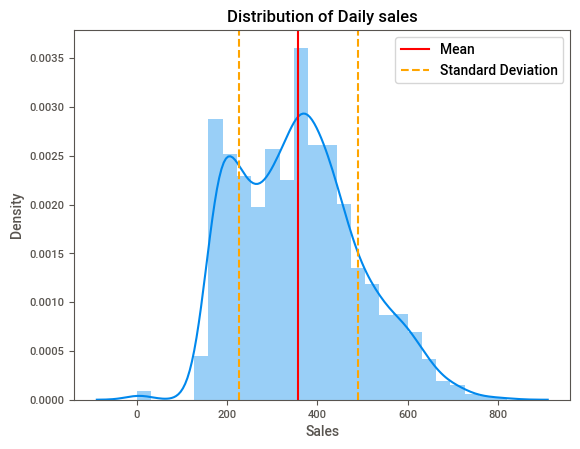

Mean:  358.0324299345287
Standard Deviation:  131.5855506019888
Skewness:  0.4104671892072682


In [95]:
# Resample the "sales" column to get the daily mean and fill missing values
sales_daily = merged_df['sales'].resample('D').mean().fillna(method='bfill')

# Convert the Series to a numpy array
sales_daily_array = np.array(sales_daily)

# Calculate the mean and standard deviation of the daily sales
mean_sales = np.mean(sales_daily_array)
std_sales = np.std(sales_daily_array)

# Calculate the skewness of the daily sales
skew_sales = skew(sales_daily_array)

# Create a KDE plot of the daily transactions
sns.distplot(sales_daily_array)

# Set the title and axis labels
plt.title("Distribution of Daily sales")
plt.xlabel("Sales")

# Add the mean and standard deviation to the plot
plt.axvline(mean_sales, color='red', label='Mean')
plt.axvline(mean_sales - std_sales, color='orange', linestyle='--', label='Standard Deviation')
plt.axvline(mean_sales + std_sales, color='orange', linestyle='--')
plt.legend()

# Display the plot
plt.show()

# Print the mean, standard deviation, and skewness of the daily sales
print("Mean: ", mean_sales)
print("Standard Deviation: ", std_sales)
print("Skewness: ", skew_sales)


A skewness of 0.410 means that the distribution of the daily sales is slightly skewed to the right (positive skew). This indicates that there are more days with lower sales values and fewer days with higher sales values. A positive skewness means that the tail of the distribution is longer on the right side than on the left. In other words, there are a few days with very high sales that pull the mean to the right. This information can be useful for decision-making or forecasting, as it suggests that the sales values may not be normally distributed and may require additional data analysis or modeling techniques.

## BIVARIATE ANALYSIS 

##### Sales & Transactions

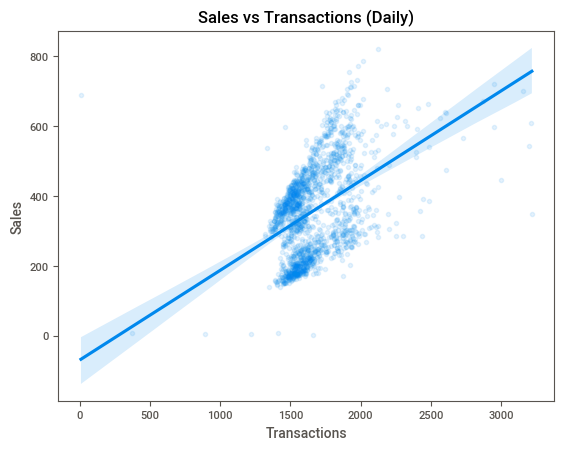

In [96]:
# Resample the data to a daily frequency and calculate the mean
daily_sales = merged_df['sales'].resample('D').mean()
daily_transactions = merged_df['transactions'].resample('D').mean()

# Create a scatter plot with a regression line
sns.regplot(x=daily_transactions, y=daily_sales, scatter_kws={"alpha":0.1})
plt.title("Sales vs Transactions (Daily)")
plt.xlabel("Transactions")
plt.ylabel("Sales")
plt.show()

There is a strong correlation between sales and transactions 

In [97]:
##### Total Sales by Day

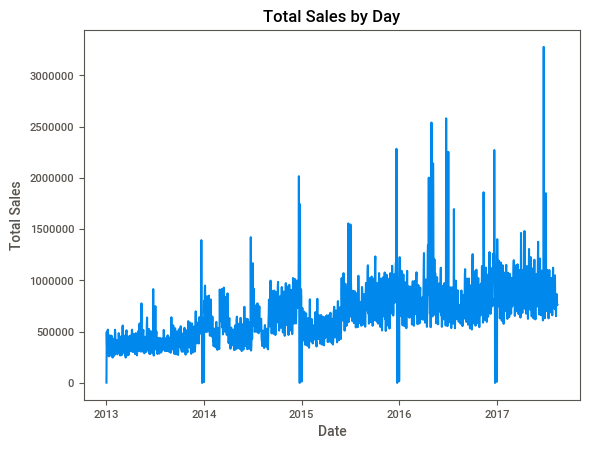

In [98]:
# Resample the data by day and calculate the total sales for each day
sales_daily = merged_df['sales'].resample('D').sum()

# Create a line plot of the "sales" column
plt.plot(sales_daily.index, sales_daily)

# Set the title and axis labels
plt.title("Total Sales by Day")
plt.xlabel("Date")
plt.ylabel("Total Sales")

# Display the plot
plt.show()

Sales increasing significantly as can be observed year-after-year. The increasing trend in total sales year-after-year suggests that the business is growing and generating more revenue over time

##### Total Transactions By Day

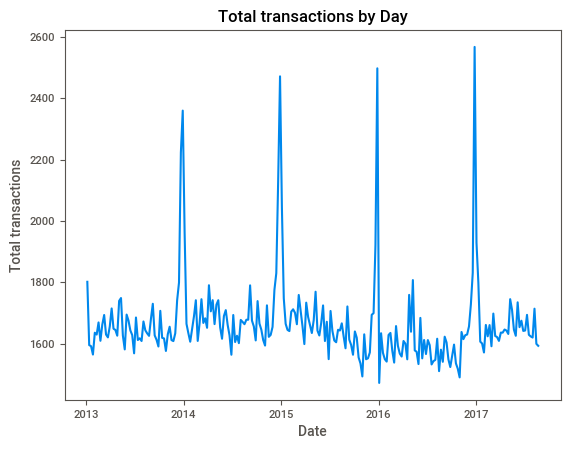

In [99]:
# Resample the "transactions" column to get the daily mean
transaction_daily = merged_df['transactions'].resample('W').mean()

# Create a line plot of the "sales" column
plt.plot(transaction_daily.index, transaction_daily)

# Set the title and axis labels
plt.title("Total transactions by Day")
plt.xlabel("Date")
plt.ylabel("Total transactions")

# Display the plot
plt.show()

In [101]:
##### Promotion vs No Promotion 

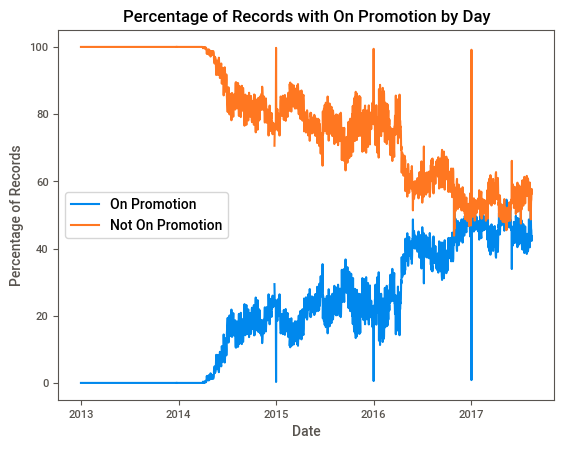

In [100]:
df = merged_df.copy()
df['onpromotion'] = np.where(df['onpromotion'] > 0, 1, 0)

promotions_daily = df['onpromotion'].resample('D').agg(lambda x: np.nan if np.isnan(x).all() else (np.nansum(x > 0) / np.sum(~np.isnan(x))) * 100)
not_promotions_daily = df['onpromotion'].resample('D').agg(lambda x: np.nan if np.isnan(x).all() else (np.nansum(x == 0) / np.sum(~np.isnan(x))) * 100)

# Create a line plot of the "onpromotion" column
plt.plot(promotions_daily.index, promotions_daily, label='On Promotion')
plt.plot(not_promotions_daily.index, not_promotions_daily, label='Not On Promotion')

# Set the title and axis labels
plt.title("Percentage of Records with On Promotion by Day")
plt.xlabel("Date")
plt.ylabel("Percentage of Records")
plt.legend()

# Display the plot
plt.show()

##### Products on Promotion over time 

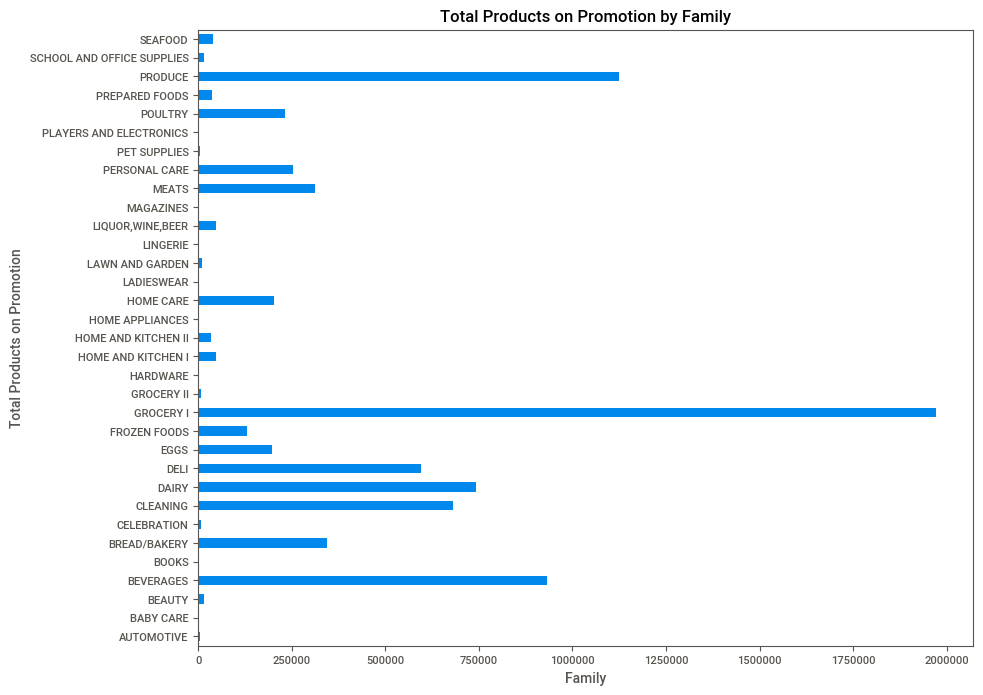

In [102]:
# Group by family and sum the onpromotion column
onpromotion_by_family = merged_df.groupby('family')['onpromotion'].sum()

# Create a bar plot of the total onpromotion by family
onpromotion_by_family.plot(kind='barh', figsize=(10, 8))

# Set the title and axis labels
plt.title("Total Products on Promotion by Family")
plt.xlabel("Family")
plt.ylabel("Total Products on Promotion")

# Display the plot
plt.show()

##  MULTIVARIATE ANALYSIS

#### Correlation Analysis 

In [105]:
# Select only the numerical columns you want to include in the correlation matrix
num_cols = ['sales', 'transactions', 'dcoilwtico', 'onpromotion']

# Calculate the correlation matrix
merged_df[num_cols].corr()

sales  transactions  dcoilwtico  onpromotion
sales         1.000000      0.217052   -0.075675     0.428241
transactions  0.217052      1.000000    0.011817     0.031977
dcoilwtico   -0.075675      0.011817    1.000000    -0.154418
onpromotion   0.428241      0.031977   -0.154418     1.000000

<AxesSubplot: >

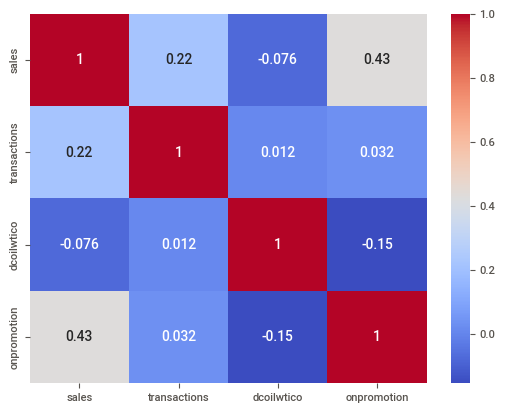

In [106]:
# Select only the numerical columns you want to include in the correlation matrix
num_cols = ['sales', 'transactions', 'dcoilwtico', 'onpromotion']

# Calculate the correlation matrix
corr_matrix = merged_df[num_cols].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [107]:
#Factor Anlaysis using correlation matrix 

df = merged_df

# Select the predictor variables you want to include
predictor_vars = ['transactions', 'onpromotion', 'dcoilwtico', 'Year']

# Calculate the correlation coefficients between sales and the predictor variables
corr_coef = df[predictor_vars + ['sales']].corr()['sales'][:-1]

# Sort the correlation coefficients in descending order by absolute value
corr_coef_abs = abs(corr_coef).sort_values(ascending=False)

# Print the sorted list of predictor variables and their correlation coefficients
print(corr_coef_abs)

onpromotion     0.428241
transactions    0.217052
Year            0.081320
dcoilwtico      0.075675
Name: sales, dtype: float64


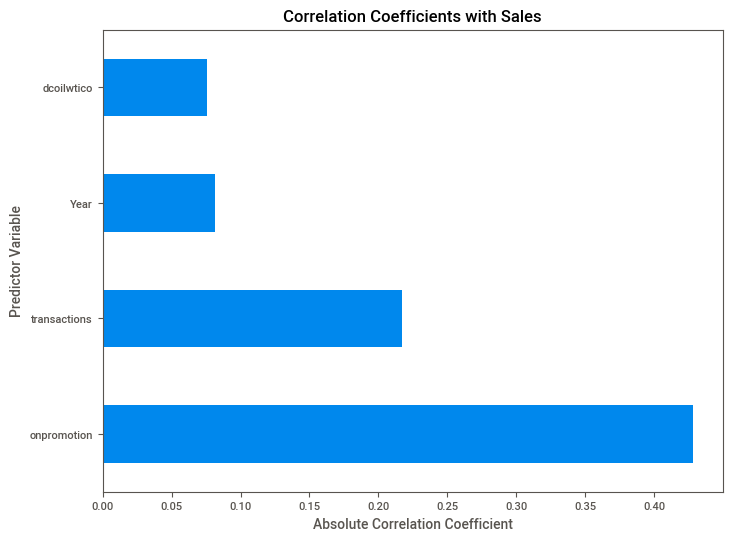

In [108]:
# Create a horizontal bar chart of the sorted correlation coefficients
fig, ax = plt.subplots(figsize=(8, 6))
corr_coef_abs.plot.barh(ax=ax)

# Set the title and axis labels
ax.set_title("Correlation Coefficients with Sales")
ax.set_xlabel("Absolute Correlation Coefficient")
ax.set_ylabel("Predictor Variable")

# Show the plot
plt.show()

##### Outlier analysis for sales by city

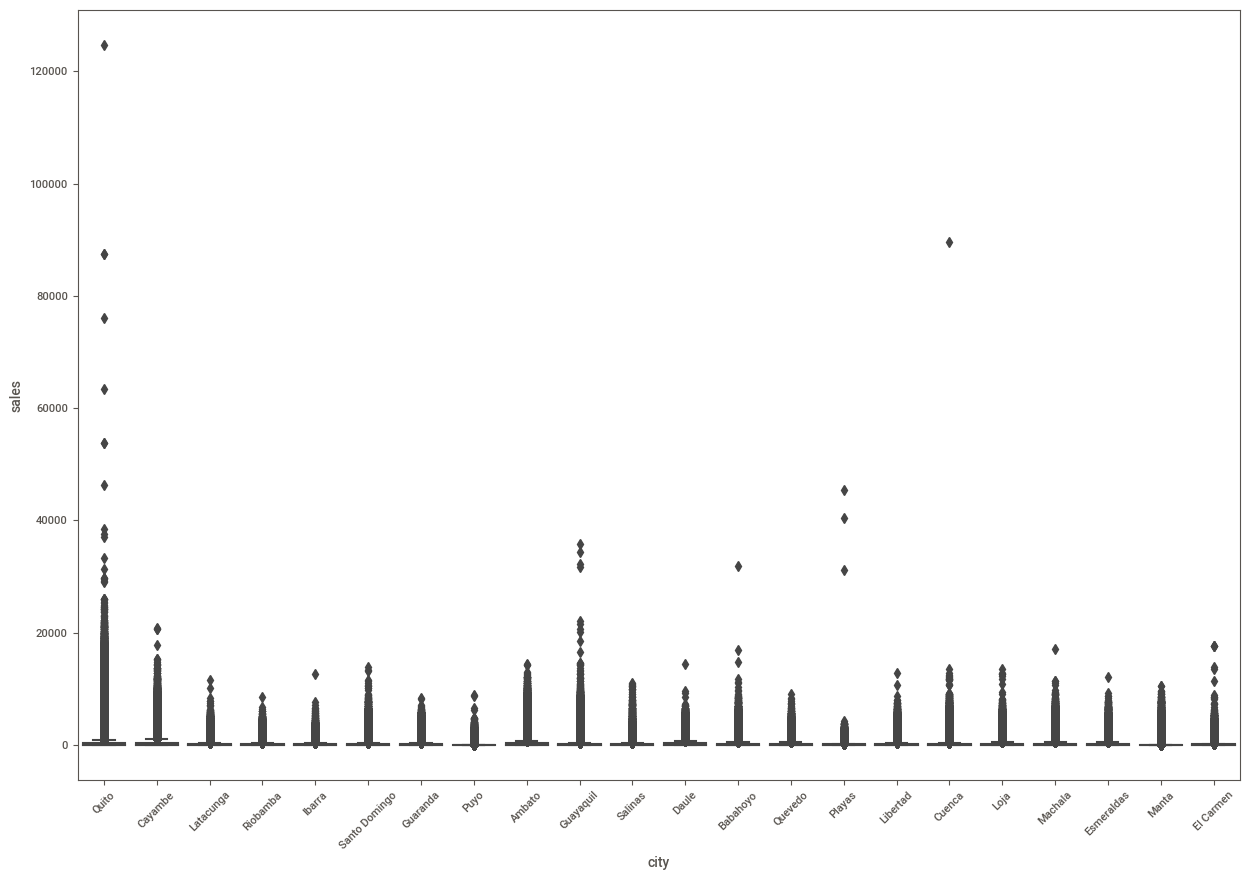

In [109]:


df = merged_df.copy()

# Create a box plot of sales by city
plt.figure(figsize=(15, 10))
sns.boxplot(x='city', y='sales', data=df)
plt.xticks(rotation=45)
plt.show()

##### Outlier analysis for transaction by city

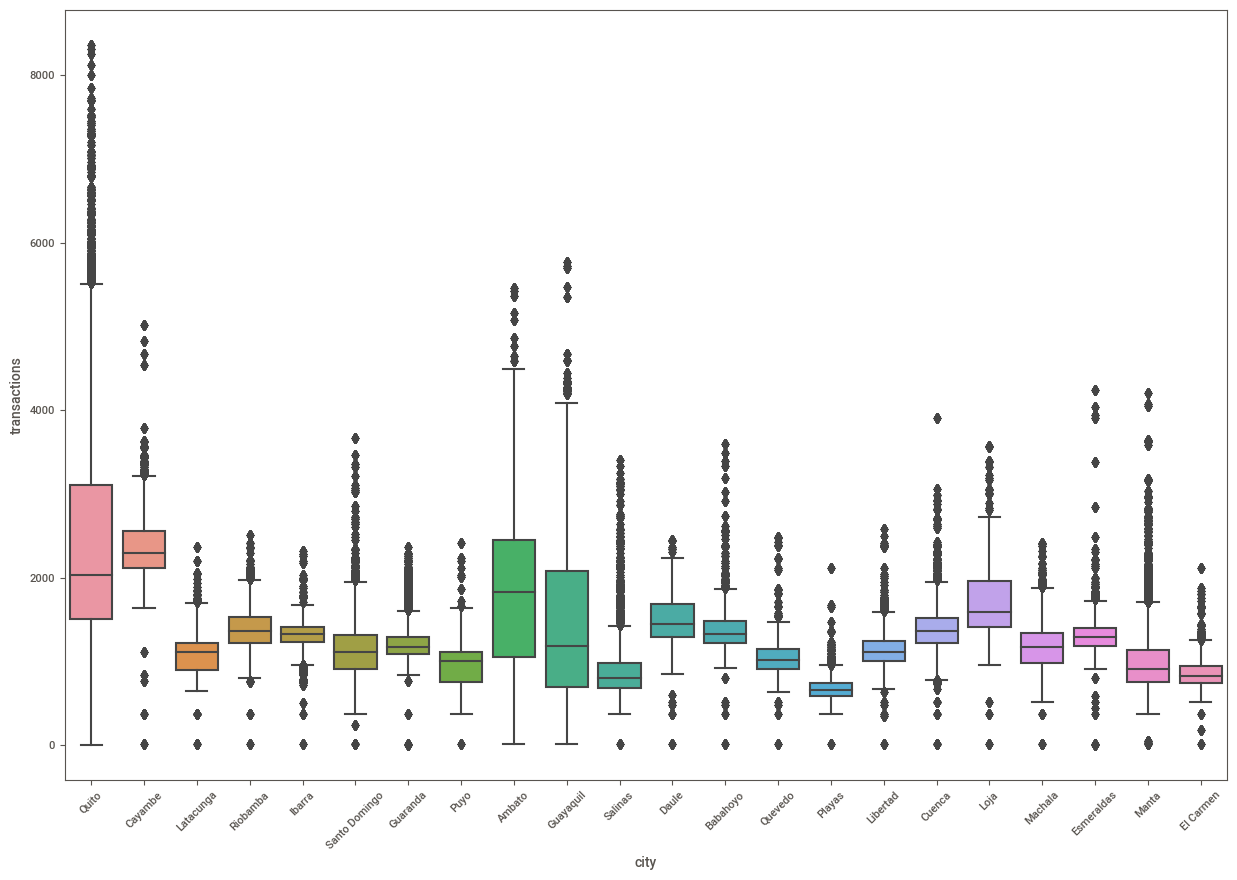

In [110]:


df = merged_df.copy()

# Create a box plot of sales by city
plt.figure(figsize=(15, 10))
sns.boxplot(x='city', y='transactions', data=df)
plt.xticks(rotation=45)
plt.show()

##### the cities by the number of outliers

In [111]:
# Group the data by city
grouped_df = df.groupby('city')

# Calculate the IQR and Tukey's fences for each city
q1 = grouped_df['sales'].quantile(0.25)
q3 = grouped_df['sales'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Identify the outliers for each city
outliers = {}
for city in df['city'].unique():
    outliers[city] = len(df[(df['city'] == city) & ((df['sales'] < lower_fence[city]) | (df['sales'] > upper_fence[city]))])

# Sort the cities by the number of outliers in descending order
sorted_outliers = sorted(outliers.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of cities and their number of outliers
for city, count in sorted_outliers:
    print(f"{city}: {count}")

Quito: 141035
Guayaquil: 64527
Cuenca: 24351
Santo Domingo: 23715
Manta: 23019
Machala: 15576
Ambato: 13827
Latacunga: 12399
Puyo: 12083
Loja: 8976
Libertad: 8248
Salinas: 8070
El Carmen: 7938
Daule: 7412
Guaranda: 7292
Babahoyo: 7190
Playas: 7085
Ibarra: 6991
Esmeraldas: 6982
Quevedo: 6490
Riobamba: 6445
Cayambe: 6008


# Answering the Questions 

### QUESTION 1: 
### Is the train dataset complete (has all the required dates)?

As can be observed from previous analysis the dataset has no missing values. 

In [113]:
#Checking for completeness of the dates

#we first determine the first and last dates 

merged_df.day.min(), merged_df.day.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [114]:
#Calculate the total expected number of days between the first and last days 
min_date = merged_df['day'].min()
max_date = merged_df['day'].max()
days_range = pd.date_range(start=min_date, end=max_date)
num_days = len(days_range)
num_days

1688

In [115]:
#Actual number of days
merged_df['day'].nunique()

1684

In [116]:
#Find the Missing dates
expected_dates = pd.date_range(start=merged_df['day'].min(), end=merged_df['day'].max())
missing_dates = expected_dates.difference(merged_df['day'])
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

From the result, the train dataset is mising 4 dates.These missing dates follow a sequence. All the years are missing dates of december 25th ( 12,25). This date is also a holiday in Ecuador. This analysis therfore assumes that no data was taken on this day every year as the shops may be closed down on that day each year.

### QUESTION 2

### Which dates have the lowest and highest sales for each year?

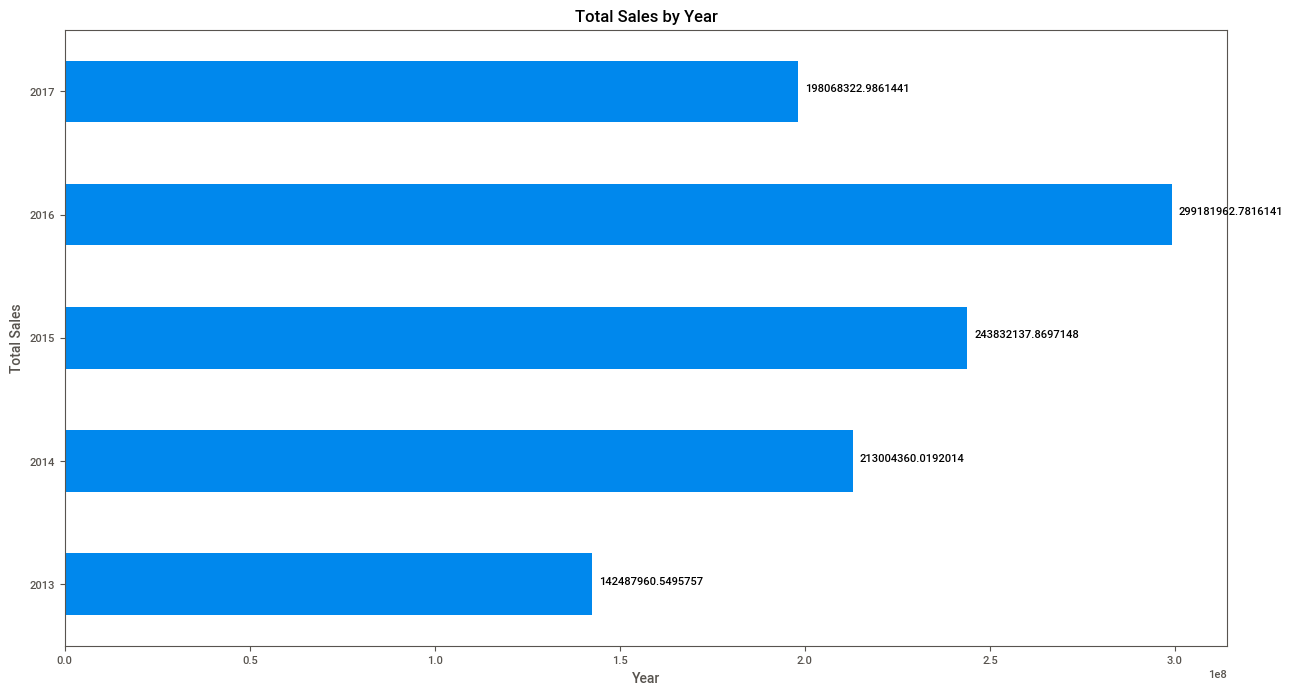

In [117]:
# Initialize figure and set size
plt.figure(figsize=(15,8))

# Group the data by year and sum the sales column for each year
grouped_df = merged_df.groupby(['Year'])['sales'].sum()

# Plot the sum of sales for each year as a bar plot
bars = grouped_df.plot.barh(title='Total Sales by Year')

# Loop through each bar and add its value as a data label
for i, v in enumerate(grouped_df):
    plt.annotate(str(v), xy=(v, i), xytext=(5, 0), textcoords='offset points', fontsize=8, color='black')

#In this example, the annotate function is used to add the value of each bar as a label. 
#The xy coordinate specifies the position of the text on the plot, while xytext 
#and textcoords specify the position of the text relative to the xy coordinate. 
#The fontsize argument sets the font size, and color sets the color of the text.

# Set x-axis label
plt.xlabel('Year')

# Set y-axis label
plt.ylabel('Total Sales')

# Display the plot
plt.show()

The Company recorded the highest sales in 2016, followed by 2015 and then 2014.The lowest sales was recorded in 2013 followed by 2017. However, the data for 2017 was collected for only 8 months (2017/08/15) which may account for the ranking. So we focus on the highest (2016) and howest (2013)

In [118]:
#Find the date with the highest sales record 

# Group the merged_df data by the day column and calculate the maximum sales value for each day
date_data = merged_df.groupby(by=["day"]).agg({"sales":"max"}).reset_index()

# Locate the row in date_data that has the maximum sales value
max_day = date_data.loc[date_data['sales'].idxmax()]

# Print the resulting row with the maximum sales value
print(max_day)

day      2016-05-02 00:00:00
sales               124717.0
Name: 1214, dtype: object


The highest sales recorded within the given period is 124,717 which occured on the 2nd of May, 2016

In [119]:
# Check the maximum sales per year 

# Extracting year from the 'day' column and adding it as a new column 'year' in merged_df
merged_df['year'] = pd.DatetimeIndex(merged_df['day']).year

# Grouping merged_df by year and day, and aggregating sales column to find the maximum value
date_data = merged_df.groupby(by=["year", "day"]).agg({"sales":"max"}).reset_index()

# Finding the row which has the maximum sales for each year 
max_day = date_data.loc[date_data.groupby(['year'])['sales'].idxmax()]

# Printing the resulting max_day dataframe
print(max_day)

      year        day       sales
315   2013 2013-11-12   46271.000
705   2014 2014-12-08   45361.000
1075  2015 2015-12-14   40351.460
1214  2016 2016-05-02  124717.000
1548  2017 2017-04-02   38422.625


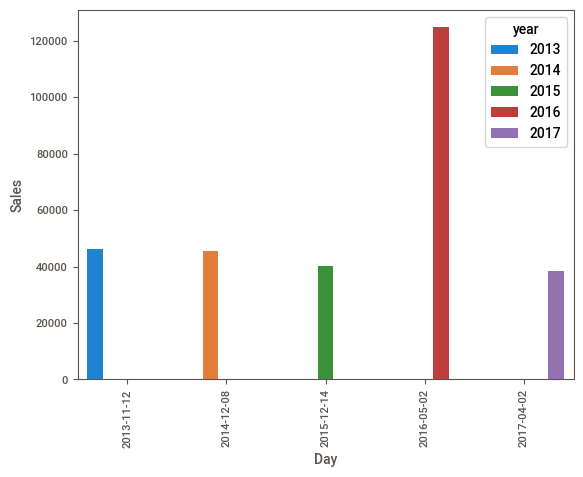

In [120]:
#Plot the day that recorded the maximum sales for each year  

# Add a new column 'day' to the merged_df dataframe, extracting just the date part from the existing day column
merged_df['day'] = pd.DatetimeIndex(merged_df['day']).date

# Group the merged_df dataframe by year and day, and get the maximum sales for each year/day combination
date_data = merged_df.groupby(by=["year", "day"]).agg({"sales":"max"}).reset_index()

# Get the maximum sales for each year, by finding the row with the maximum sales for each year
max_day = date_data.loc[date_data.groupby(['year'])['sales'].idxmax()]

# Use seaborn to create a bar plot, showing the maximum sales for each year, with the x-axis being the day and the y-axis being the sales
sns.barplot(x='day', y='sales', hue='year', data=max_day)

# Label the x-axis as "Day"
plt.xlabel("Day")

# Label the y-axis as "Sales"
plt.ylabel("Sales")

# Rotate the x-axis labels 90 degrees to make them more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [121]:
#Check the day with the least recorded sale 

date_data = merged_df.groupby(by=["day"]).agg({"sales":"min"}).reset_index()
min_day = date_data.loc[date_data.groupby(['day'])['sales'].idxmax()]

#date_data = df.groupby(by=["day"]).agg({"sales":"max"}).reset_index()
min_day = date_data.loc[date_data['sales'].idxmax()]
print(min_day)

day      2013-01-01
sales           0.0
Name: 0, dtype: object


In [122]:
#Check the day with the least recorded sale for each year 

merged_df['year'] = pd.DatetimeIndex(merged_df['day']).year
date_data = merged_df.groupby(by=["year", "day"]).agg({"sales":"min"}).reset_index()
min_day = date_data.loc[date_data.groupby(['year'])['sales'].idxmax()]
print(min_day)

      year         day  sales
0     2013  2013-01-01    0.0
364   2014  2014-01-01    0.0
728   2015  2015-01-01    0.0
1092  2016  2016-01-01    0.0
1457  2017  2017-01-01    0.0


These are dates where no sales were recorded.  This suggests that the stores are closed on the first day of each year 

### QUESTION 3. 

### Did the earthquake impact sales?

For Context, the earthquake happened on the 16th of April

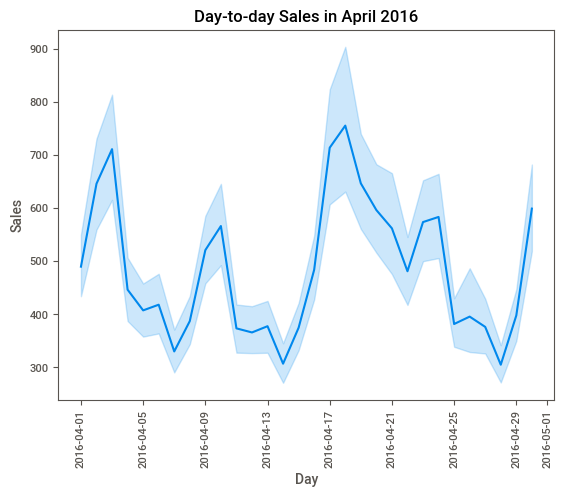

In [123]:
# Filter data to include only April of 2016
df = merged_df.copy()

# Filter data to include only April of 2016
april_2016_df = df[(df.index.month == 4) & (df.index.year == 2016)]

# Create line plot
sns.lineplot(data=april_2016_df['sales'])
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Day-to-day Sales in April 2016")
plt.xticks(rotation=90)
plt.show()

In [124]:
# Filter data to include only the 17th of April 2016
april_17_2016_df = april_2016_df[april_2016_df.index.day == 17]

# Filter data to include only the 17th of April 2016
april_16_2016_df = april_2016_df[april_2016_df.index.day == 16]

# Calculate the total sales made on the 17th of April 2016
total_sales_16th = april_16_2016_df['sales'].sum()

# Calculate the total sales made on the 17th of April 2016
total_sales_17th = april_17_2016_df['sales'].sum()

# Print the total sales
print("Total sales made on the 16th of April 2016:", total_sales_16th)

print("")

# Print the total sales
print("Total sales made on the 17th of April 2016:", total_sales_17th)

Total sales made on the 16th of April 2016: 862121.4920360001

Total sales made on the 17th of April 2016: 1271833.7392550001


Altrghough earth quake happened on the 16th of April, Sales shot up the next day. We can conclude that the earth didnt have any negative effect on sales 

### Question 4. 

### Are certain groups of stores selling more products? (Cluster, city, state, type)

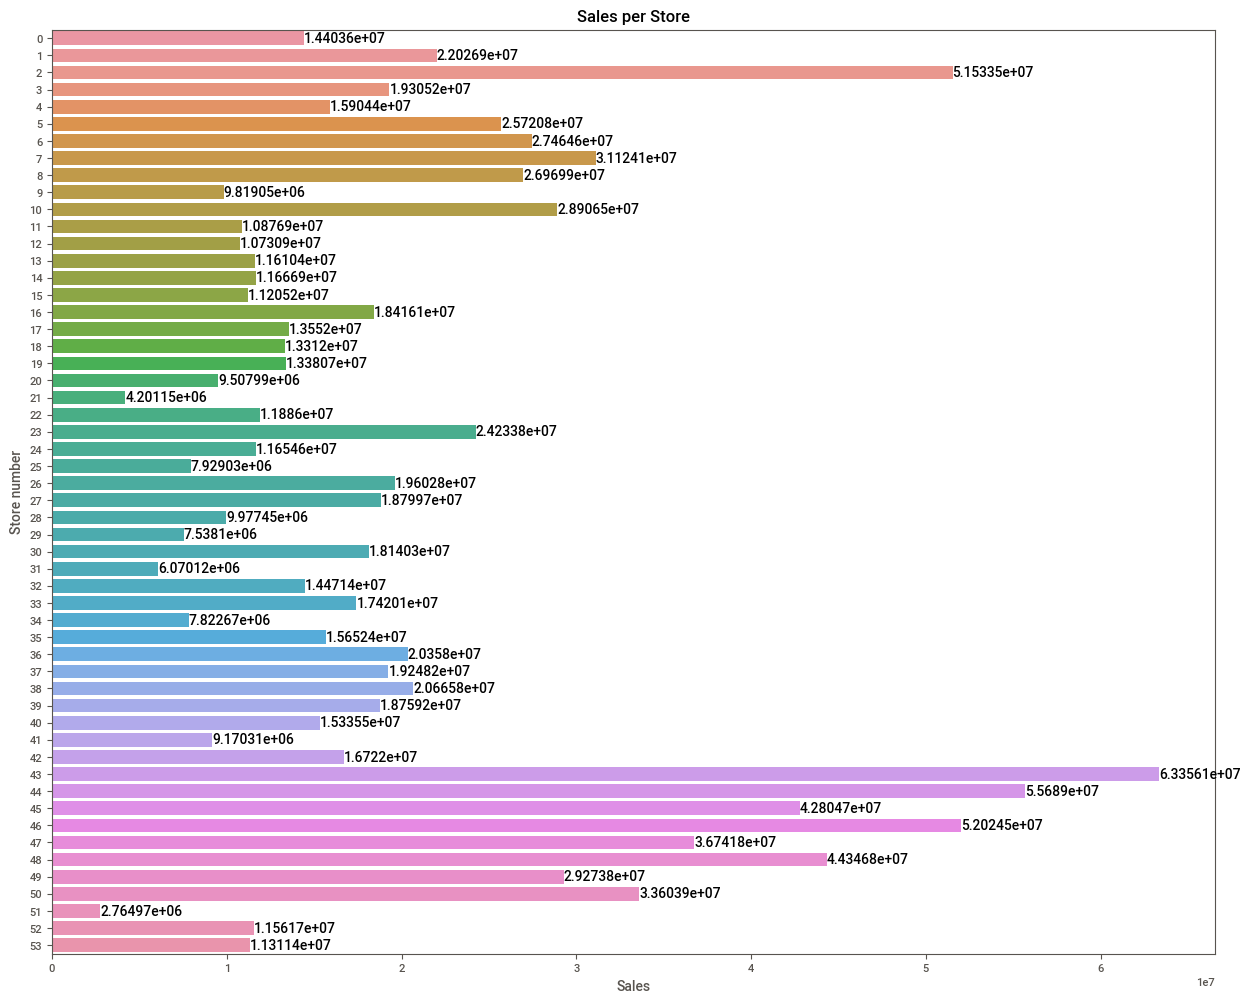

In [125]:
#Total sales of Each Store
x = merged_df.groupby(['store_nbr'],as_index = False).agg({'sales': 'sum'})

#ploting store_nbr vs unit sales
fig, ax = plt.subplots()
fig.set_size_inches(15,12)
ax = sns.barplot(x = "sales", y=x.index, data = x, orient='h')

# Adding data labels
for i in ax.containers:
    ax.bar_label(i)

plt.title('Sales per Store')
plt.xlabel('Sales')
plt.ylabel('Store number')
plt.show()


In [126]:
#Total sales of each store
x = merged_df.groupby(['store_nbr'], as_index=False).agg({'sales': 'sum'})

#Get the store with the highest sales
max_sales_store = x[x['sales'] == x['sales'].max()].iloc[0, 0]
max_sales = x[x['sales'] == x['sales'].max()].iloc[0, 1]

#Get the store with the minimum sales
min_sales_store = x[x['sales'] == x['sales'].min()].iloc[0, 0]
min_sales = x[x['sales'] == x['sales'].min()].iloc[0, 1]


print("Store with highest sales:", max_sales_store)
print("Corresponding sales value:", max_sales)
print("")
print("Store with lowest sales:", min_sales_store)
print("Corresponding sales value:", min_sales)

Store with highest sales: 44
Corresponding sales value: 63356137.229999

Store with lowest sales: 52
Corresponding sales value: 2764970.280249


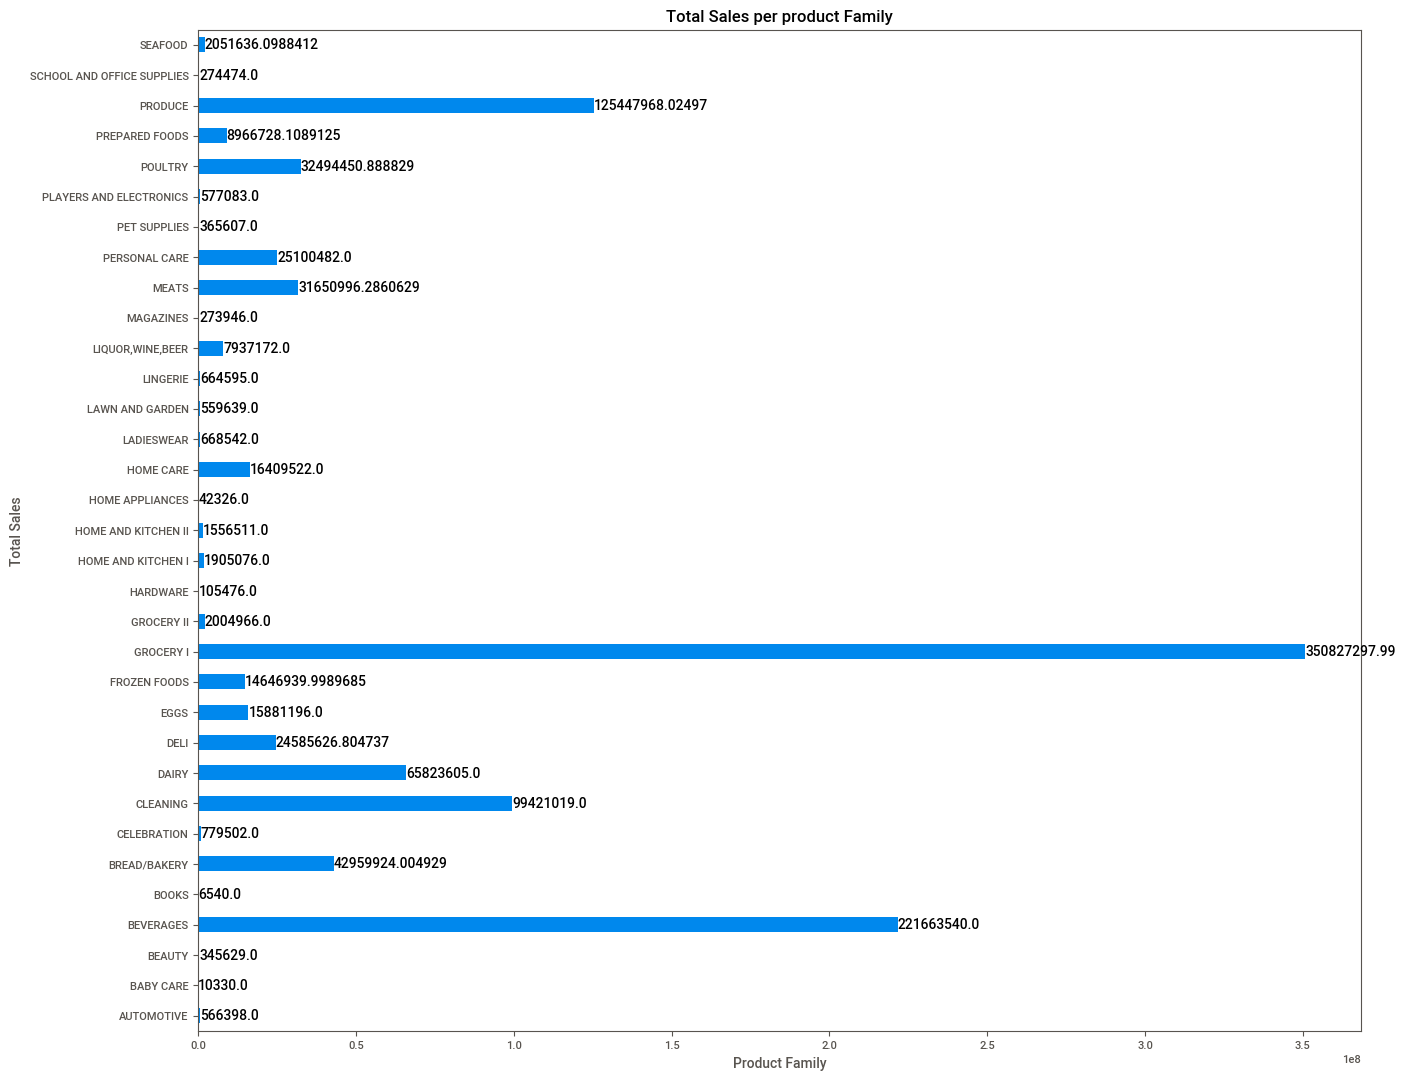

In [127]:
#Total Sales per product Family 

plt.figure(figsize=(15,13))
families = merged_df.groupby(['family'])['sales'].sum()
families.plot.barh(title='Total Sales per product Family')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')

for i, sales in enumerate(families):
    plt.text(sales, i, str(sales), color='black', va='center')

plt.show()

Grocery I has the highest sales

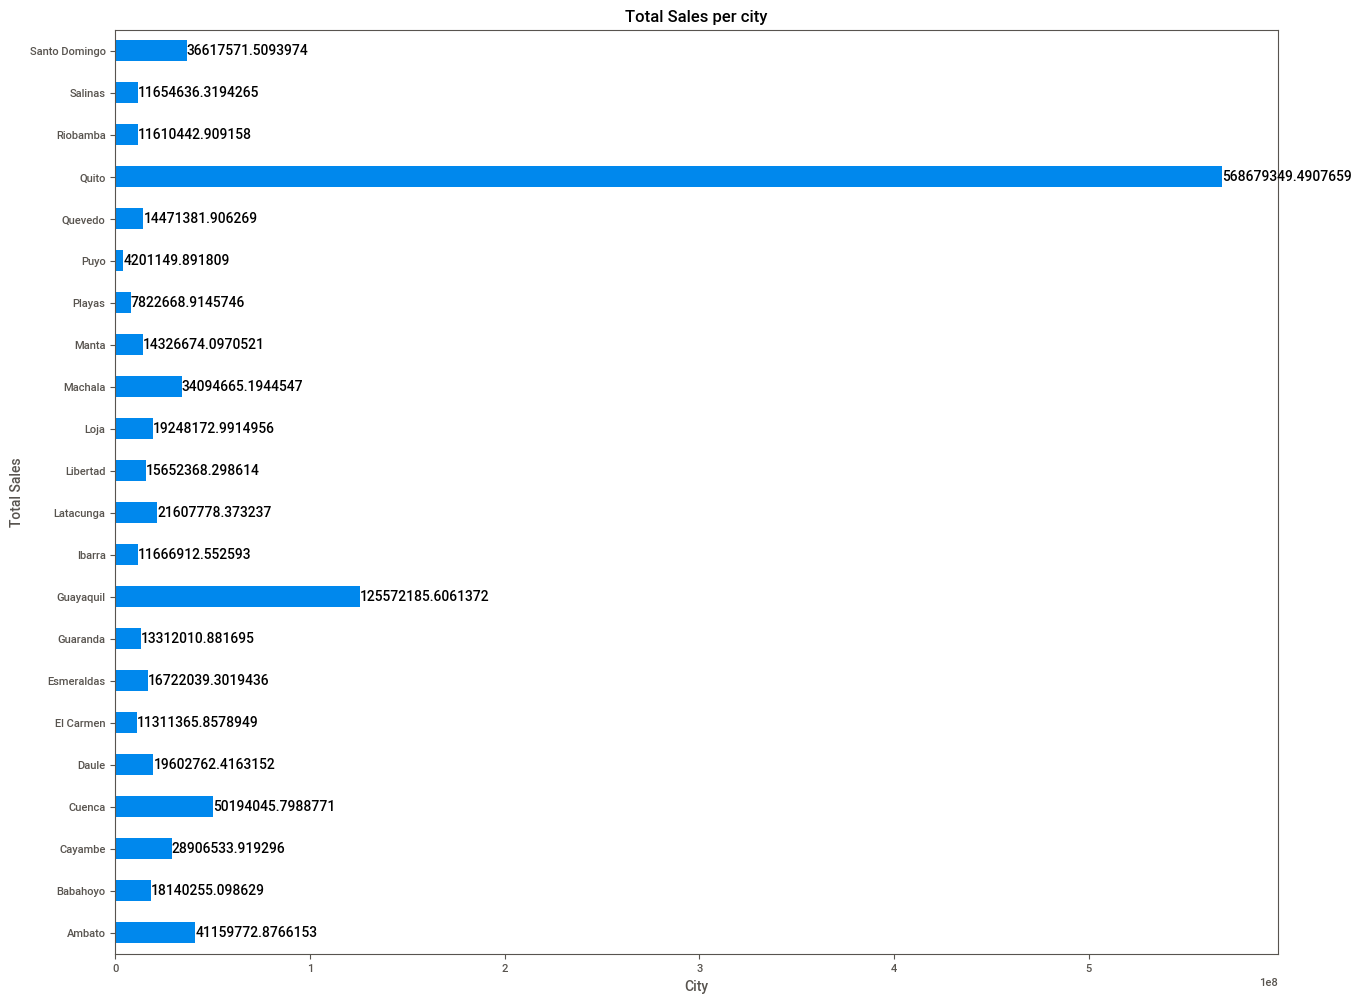

In [128]:
plt.figure(figsize=(15,12))

cities = merged_df.groupby(['city'])['sales'].sum()
cities.plot.barh(title='Total Sales per city')
plt.xlabel('City')
plt.ylabel('Total Sales')

for i, sales in enumerate(cities):
    plt.text(sales, i, str(sales), color='black', va='center')
    
plt.show()

Quito recorded the highest sales amount 

Lets investigate the product with  the highest sale in Quito 

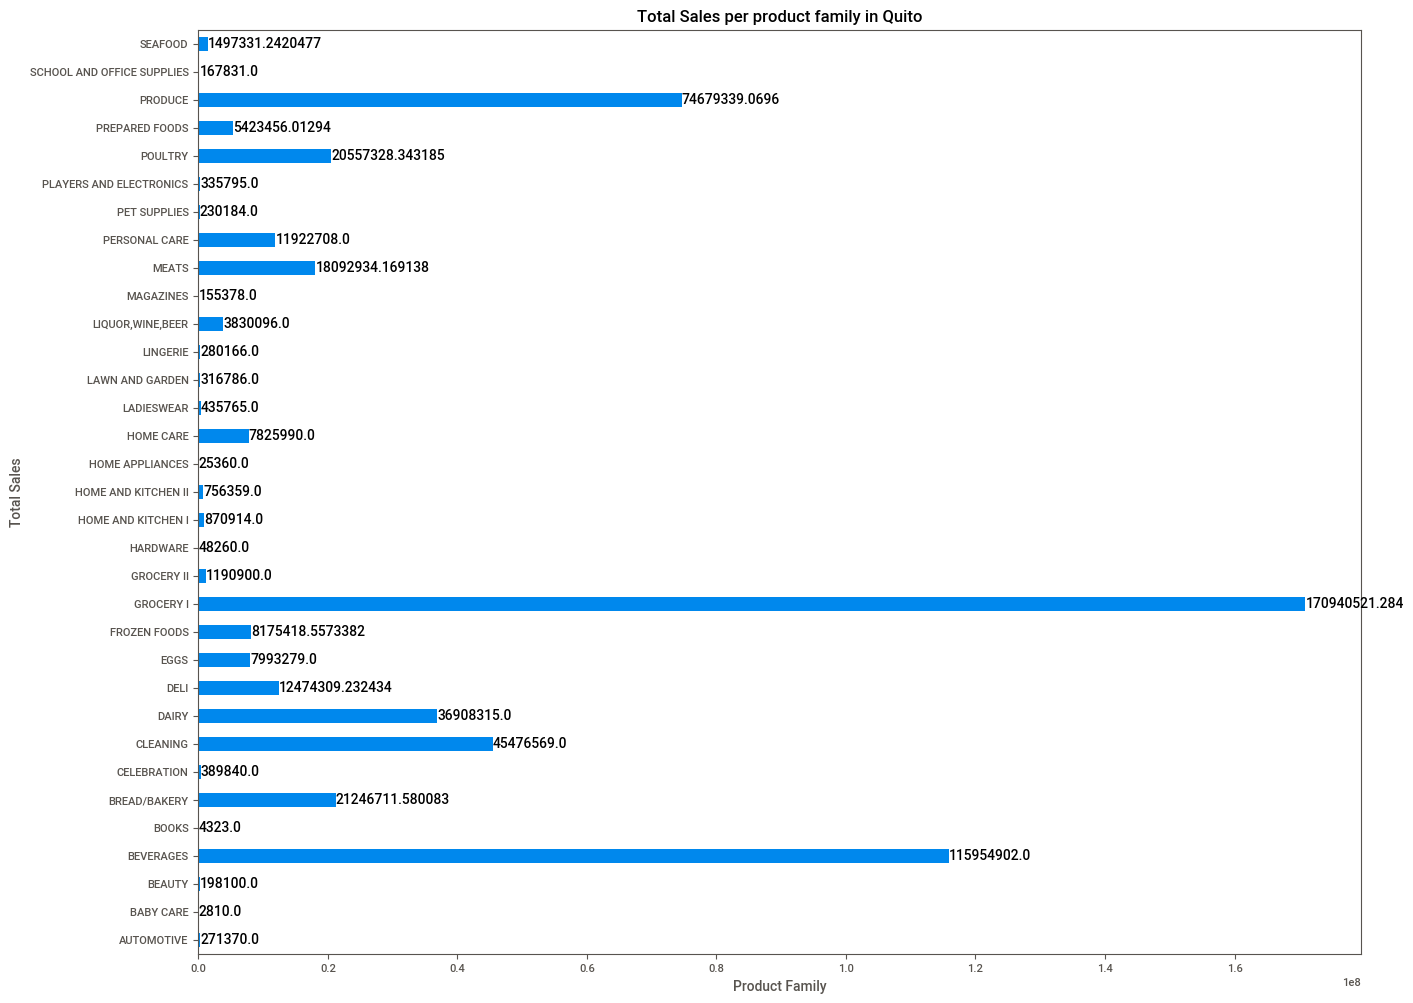

In [129]:
#Filter sales for Quito grouped by product and sales 
quito_sales = merged_df[merged_df['city'] == 'Quito'].groupby(['family'])['sales'].sum()
#Plot the results 
plt.figure(figsize=(15,12))
quito_sales.plot.barh(title='Total Sales per product family in Quito')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')

for i, sales in enumerate(quito_sales):
    plt.text(sales, i, str(sales), color='black', va='center')
    
plt.show()

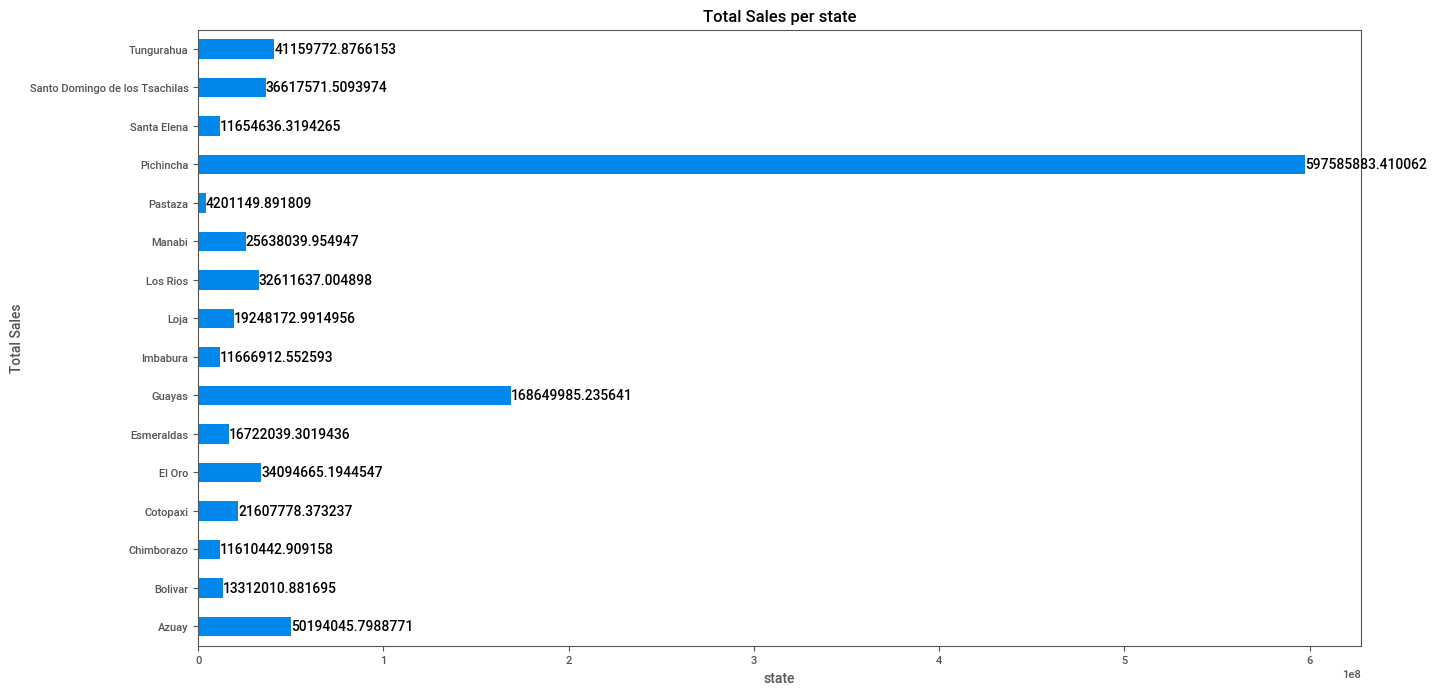

In [130]:
#Which state has the higest sales 

plt.figure(figsize=(15,8))
state_sales = merged_df.groupby(['state'])['sales'].sum()
state_sales.plot.barh(title='Total Sales per state')
plt.xlabel('state')
plt.ylabel('Total Sales')

for i, sales in enumerate(state_sales):
    plt.text(sales, i, str(sales), color='black', va='center')
    
plt.show()

Pichincha has the highest Sales as seen 

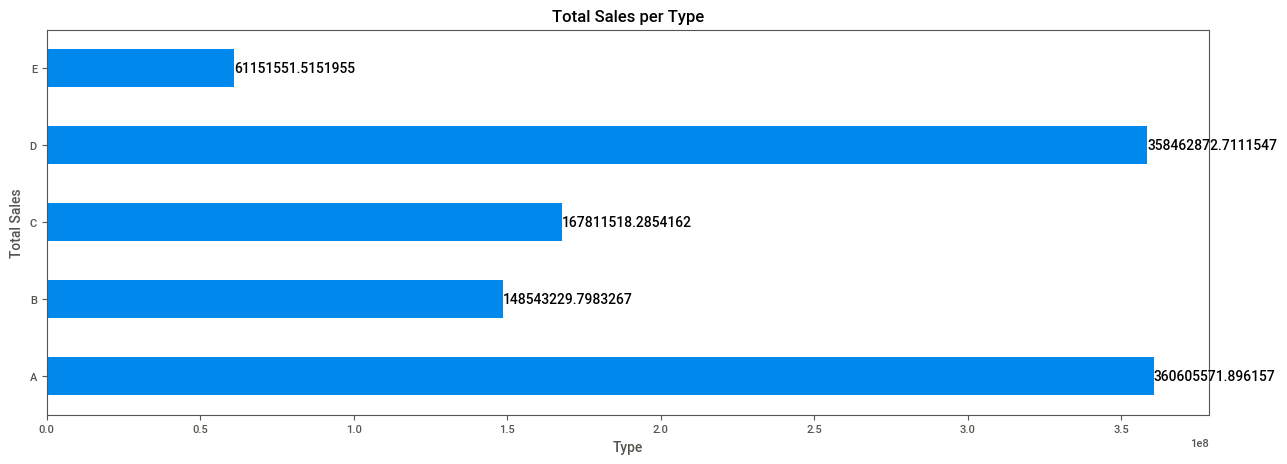

In [131]:
#Total Sales per Store Type 

plt.figure(figsize=(15,5))
storeType_sales = merged_df.groupby(['Store_type'])['sales'].sum()
storeType_sales.plot.barh(title='Total Sales per Type')
plt.xlabel('Type')
plt.ylabel('Total Sales')

for i, sales in enumerate(storeType_sales):
    plt.text(sales, i, str(sales), color='black', va='center')

plt.show()

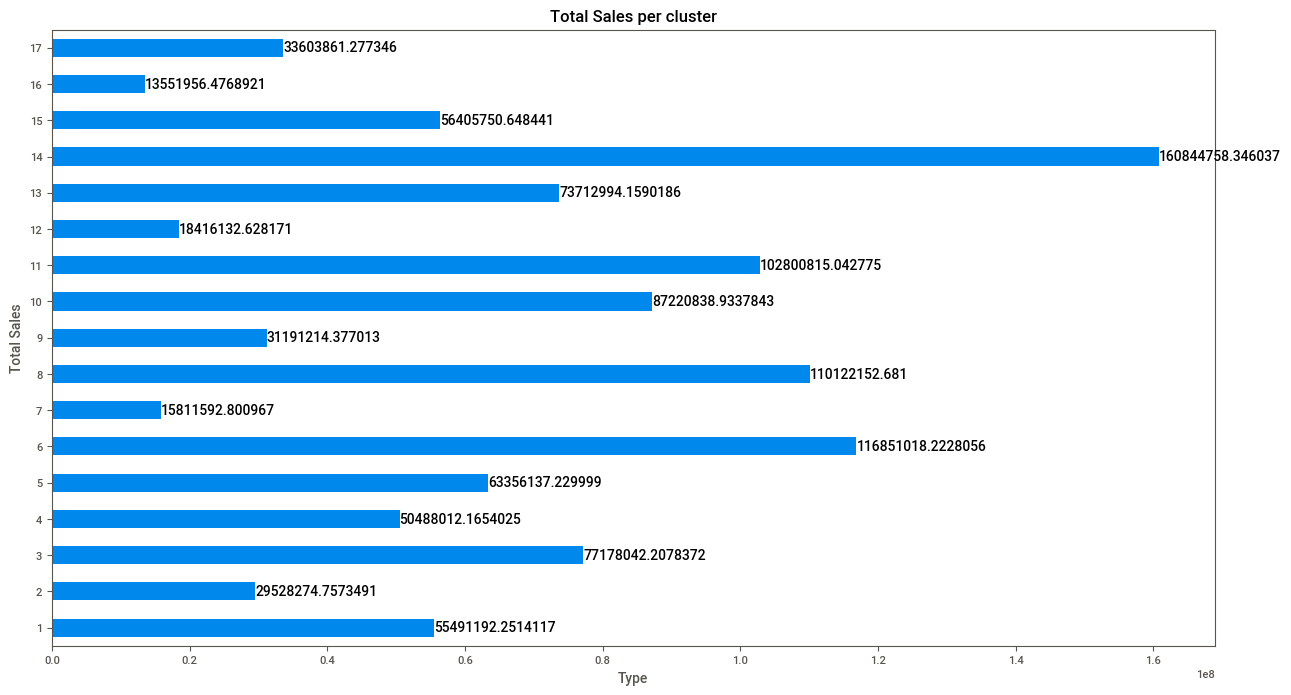

In [132]:
#Total Sales per cluster

plt.figure(figsize=(15,8))
cluster_sales = merged_df.groupby(['cluster'])['sales'].sum()
cluster_sales.plot.barh(title='Total Sales per cluster')
plt.xlabel('Type')
plt.ylabel('Total Sales')

for i, sales in enumerate(cluster_sales):
    plt.text(sales, i, str(sales), color='black', va='center')

plt.show()

In [133]:
#store_nbr
# Group data by state and city, and calculate mean sales for each group
top_products = merged_df.groupby(['store_nbr','state','city','family', 'cluster']).agg({'sales':'mean'}).reset_index()

# Sort data by sales in descending order
top_products = top_products.sort_values(by='sales',ascending=False)

# Print top products
print(top_products.head())

      store_nbr      state   city     family  cluster        sales
1464         45  Pichincha  Quito  GROCERY I       11  9758.379966
1431         44  Pichincha  Quito  GROCERY I        5  9752.598498
1530         47  Pichincha  Quito  GROCERY I       14  9244.990951
1497         46  Pichincha  Quito  GROCERY I       14  8544.773046
1422         44  Pichincha  Quito  BEVERAGES        5  7990.765461


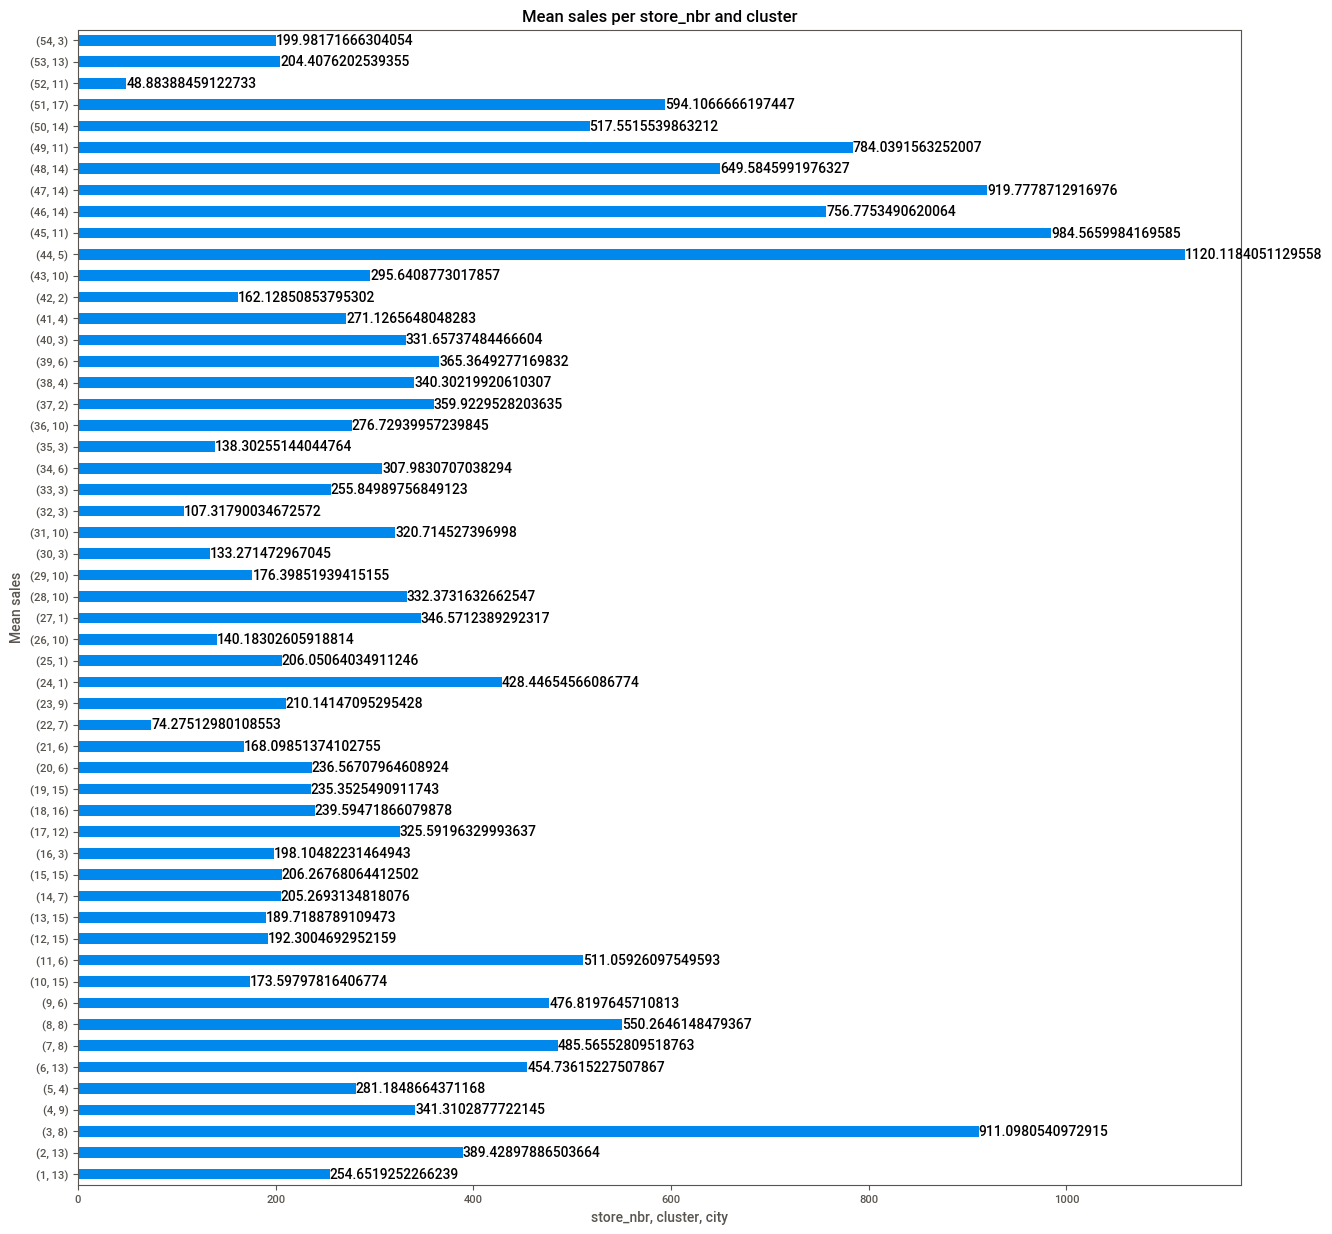

In [134]:
# Group data by store_nbr, cluster
top_products = merged_df.groupby(['store_nbr','cluster']).agg({'sales':'mean'}).reset_index()

# Sort data by sales in descending order
top_products = top_products.sort_values(by='sales',ascending=False)

# Plot the stacked bar plot
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
ax = top_products.groupby(['store_nbr', 'cluster'])['sales'].sum()
ax.plot(kind='barh', stacked=True)
plt.title('Mean sales per store_nbr and cluster')
plt.ylabel('Mean sales')
plt.xlabel('store_nbr, cluster, city')

for i, sales in enumerate(ax):
    plt.text(sales, i, str(sales), color='black', va='center')
    
    
plt.show()

<AxesSubplot: xlabel='state-city-cluster', ylabel='family'>

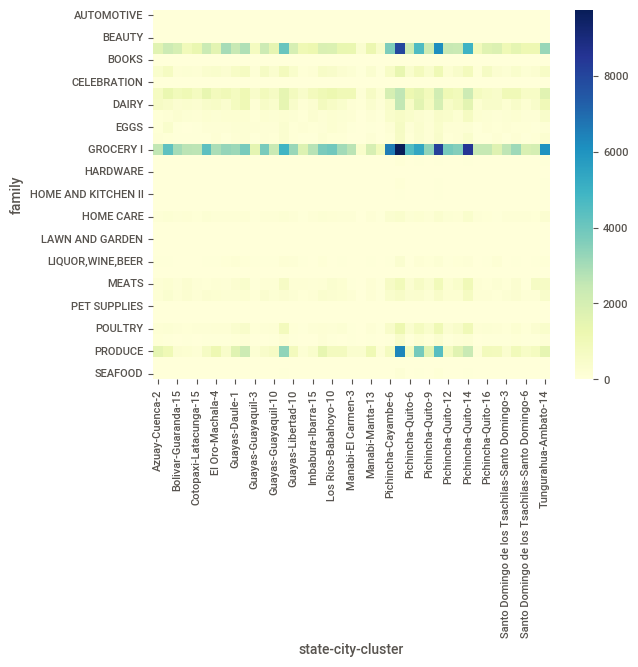

In [135]:
#store_nbr
# Group data by state and city, and calculate mean sales for each group
top_products = merged_df.groupby(['store_nbr','state','city','family', 'cluster']).agg({'sales':'mean'}).reset_index()

# Sort data by sales in descending order
top_products = top_products.sort_values(by='sales',ascending=False)

# Create pivot table
pivot_table = top_products.pivot_table(values='sales', index='family', columns=['state', 'city', 'cluster'])

# Plot heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')

In [136]:
# Group data by state and city, and calculate mean sales for each group
Low_products = merged_df.groupby(['state','city','family', 'cluster']).agg({'sales':'mean'}).reset_index()

# Sort data by sales in ascending order
Low_products = top_products.sort_values(by='sales',ascending=True)

# Print lowest products
print(Low_products.head())

      store_nbr       state        city      family  cluster  sales
1390         43  Esmeraldas  Esmeraldas       BOOKS       10    0.0
1306         40      El Oro     Machala  LADIESWEAR        3    0.0
1             1   Pichincha       Quito   BABY CARE       13    0.0
1291         40      El Oro     Machala       BOOKS        3    0.0
1687         52      Manabi       Manta       BOOKS       11    0.0


### QUESTION 5 

### Are sales affected by promotions, oil prices and holidays?

Promotion

In [137]:
#create a new column 'onpromotion_encoded'
merged_df['onpromotion_encoded'] = np.where(merged_df['onpromotion'] > 1, 1, 0)

In [138]:
#Dataset was sampled fir easier computation and analysis. 

frac=0.1 #percentage of data to be utilized 
seed = 42 #for reproducibility 

# calculate number of rows for each year
year_counts = merged_df.groupby('year').size().reset_index(name='counts')

# calculate the sample size for each year
year_samples = (year_counts['counts'] * frac).astype(int)

# create an empty list to store the samples
samples = []

# loop through each year and sample the required number of rows
for year, sample_size in zip(year_counts['year'], year_samples):
    year_df = merged_df[merged_df['year'] == year]
    sample = year_df.sample(n=sample_size, random_state=seed)
    samples.append(sample)

# concatenate the samples into a single DataFrame
sampled_df = pd.concat(samples)

In [139]:
sampled_df.shape

(305433, 22)

([<matplotlib.patches.Wedge at 0x230042513c0>,
 [Text(-0.9857422915334328, 0.4881722387461385, 'No-promotion '),
  Text(0.9857422458274451, -0.4881723310379901, 'on-promotion ')],
 [Text(-0.5376776135636906, 0.2662757665888028, '85.4%'),
  Text(0.5376775886331517, -0.2662758169298128, '14.6%')])

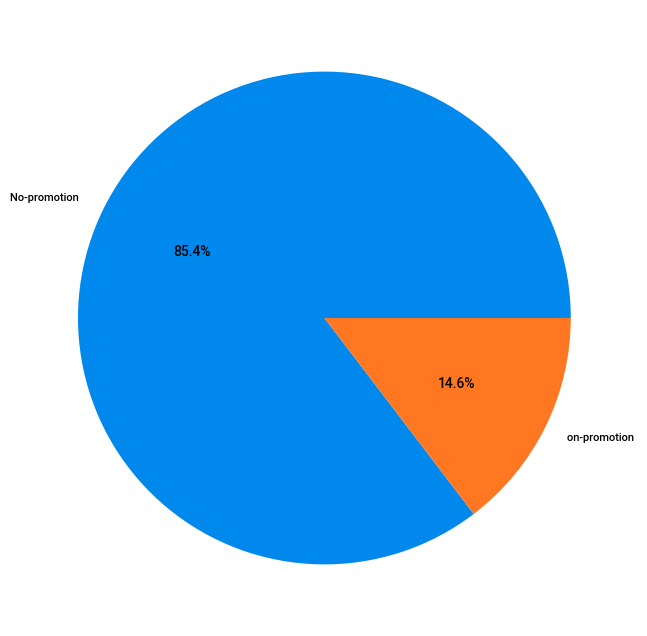

In [140]:
#A pie chart to show the distribution of the two labels 

plt.subplots(figsize = (10,8))
label = ['No-promotion ', 'on-promotion ']
label_data = merged_df['onpromotion_encoded'].value_counts()

plt.pie(label_data, labels=label, autopct='%1.1f%%')

In [142]:
#Determine teh correlation between sales and onpromotion
correlation = sampled_df['sales'].corr(sampled_df['onpromotion'])

print(correlation)

0.43075195189604676


The is a strong correlation between promotion and sales 

<AxesSubplot: xlabel='onpromotion', ylabel='sales'>

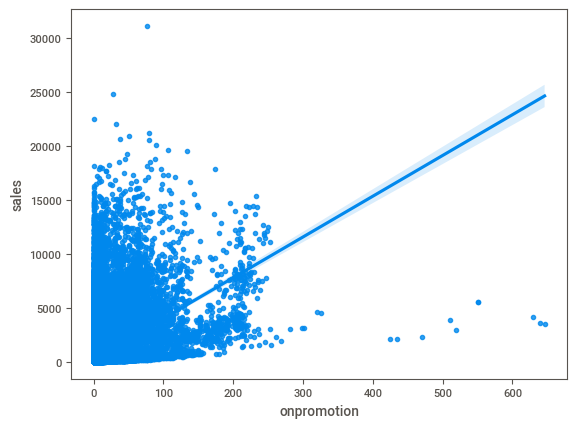

In [143]:
sns.regplot(x='onpromotion', y='sales', data=sampled_df)

In [144]:
Avg_Promo_sales = sampled_df.groupby('onpromotion_encoded')['sales'].mean().reset_index()
Avg_Promo_sales = pd.merge(Avg_Promo_sales, sampled_df[['day','onpromotion_encoded']], on='onpromotion_encoded')

Avg_Promo_sales.head()

onpromotion_encoded       sales         day
0                    0  179.334524  2013-08-27
1                    0  179.334524  2013-01-07
2                    0  179.334524  2013-03-27
3                    0  179.334524  2013-07-10
4                    0  179.334524  2013-10-26

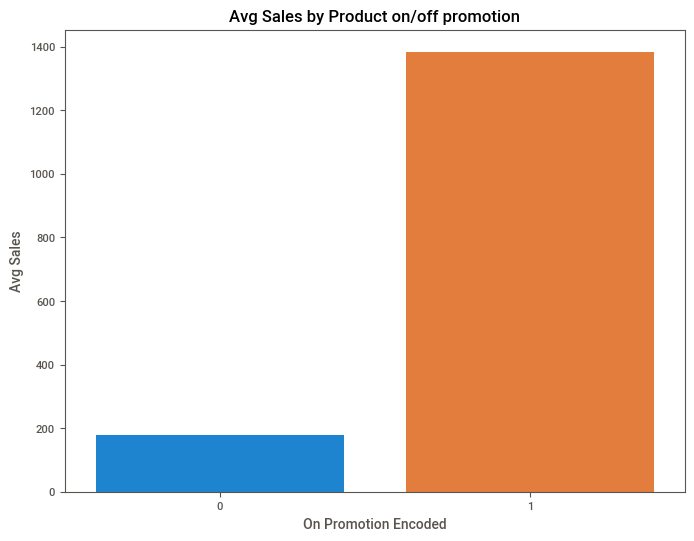

In [145]:
#Avg Sales by Product on/off promotion

plt.figure(figsize=(8,6))


ax = sns.barplot(x='onpromotion_encoded', y='sales', data=Avg_Promo_sales)


#for i, sales in enumerate(Avg_Promo_sales['sales']):
#    plt.text(i, sales, str(round(sales, 2)), color='black', ha='center')

plt.xlabel('On Promotion Encoded')
plt.ylabel('Avg Sales')
plt.title('Avg Sales by Product on/off promotion')

plt.show()

As seen products on promotion have a higher sale than products that are not on sale

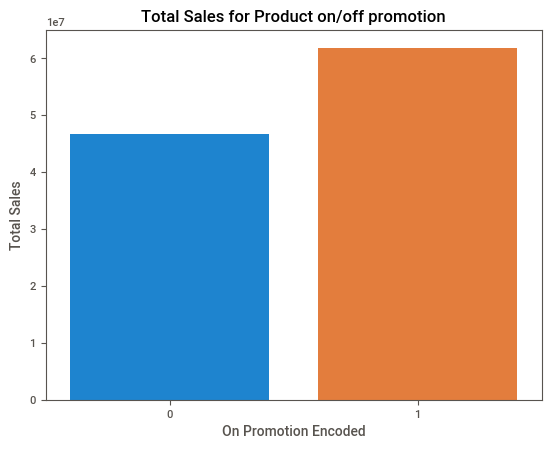

In [146]:
#Total Sales for Product on/off promotion'

sum_Promo_sales = sampled_df.groupby('onpromotion_encoded')['sales'].sum().reset_index()
sns.barplot(x='onpromotion_encoded', y='sales', data=sum_Promo_sales)

plt.xlabel('On Promotion Encoded')
plt.ylabel('Total Sales')
plt.title('Total Sales for Product on/off promotion')

plt.show()

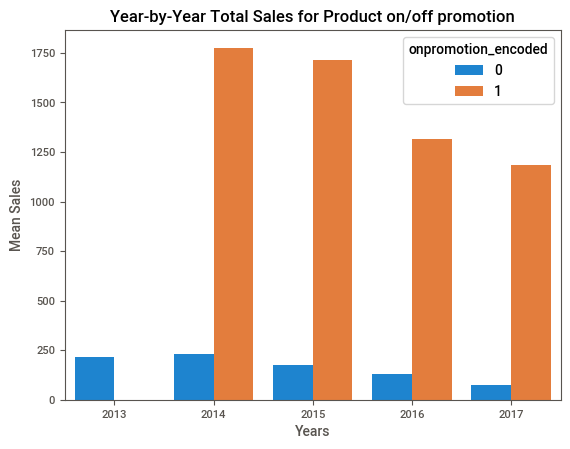

In [147]:
#Year-by-Year Total Sales for Product on/off promotion

# Calculate the average sales for each year, separated by whether the product was on promotion or not
Avg_Promo_sales = sampled_df.groupby(['onpromotion_encoded', 'Year']).agg({'sales':'mean'}).reset_index()

# Create a bar plot to visualize the average sales for each year, separated by promotion status
sns.barplot(x = 'Year', y = 'sales', hue = 'onpromotion_encoded', data = Avg_Promo_sales)


plt.xlabel('Years')
plt.ylabel('Mean Sales')
plt.title('Year-by-Year Total Sales for Product on/off promotion')

plt.show()

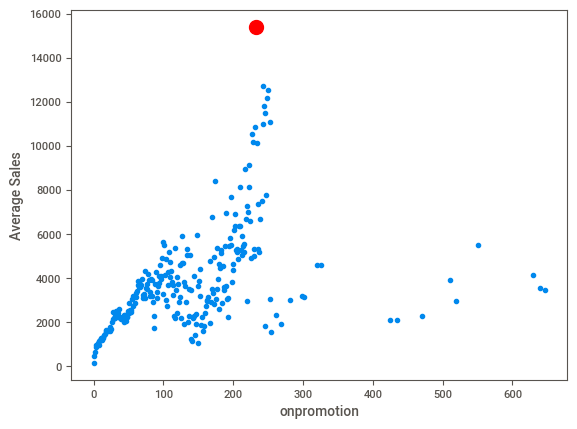

In [148]:
Avg_Promo_sales = sampled_df.groupby('onpromotion').agg({'sales':'mean'}).reset_index()

# Create the scatter plot
plt.scatter(Avg_Promo_sales['onpromotion'], Avg_Promo_sales['sales'])

# Identify the optimal onpromotion count
optimal_count = Avg_Promo_sales['onpromotion'][Avg_Promo_sales['sales'].idxmax()]

# Highlight the optimal onpromotion count
plt.scatter(optimal_count, Avg_Promo_sales.loc[Avg_Promo_sales['onpromotion'] == optimal_count, 'sales'], 
            marker='o', color='red', s=100)

plt.xlabel('onpromotion')
plt.ylabel('Average Sales')
plt.show()


We wanted to find that sweetspot in terms of the number of products on promtion that can maximize sales. As can be observed, having about 250 products on sale can optimize and improve average sales

Price

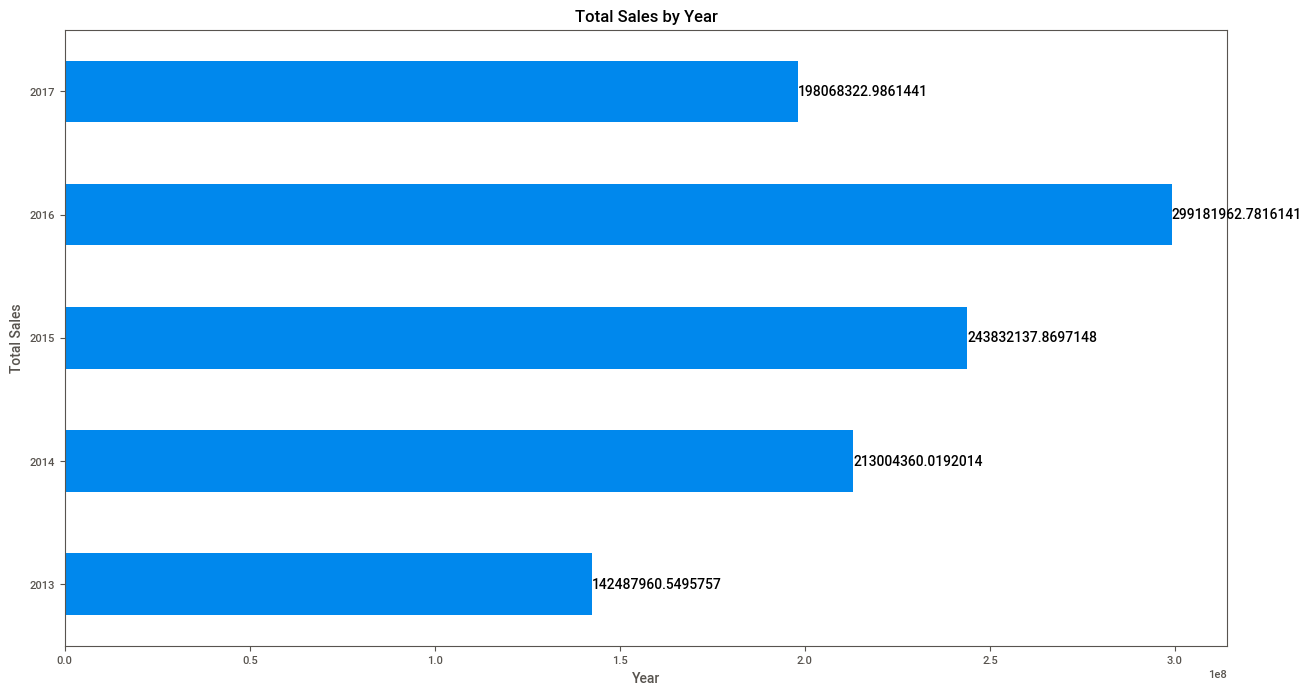

In [149]:
#Total Sales by Year

plt.figure(figsize=(15,8))
grouped_yearSales = merged_df.groupby(['Year'])['sales'].sum()
grouped_yearSales.plot.barh(title='Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

for i, sales in enumerate(grouped_yearSales):
    plt.text(sales, i, str(sales), color='black', va='center')

plt.show()

In [150]:
### oil_df plot the month by month graph of the dcoilwtico. 

oil_df2 = oil_df.set_index('date')

<AxesSubplot: xlabel='date', ylabel='dcoilwtico'>

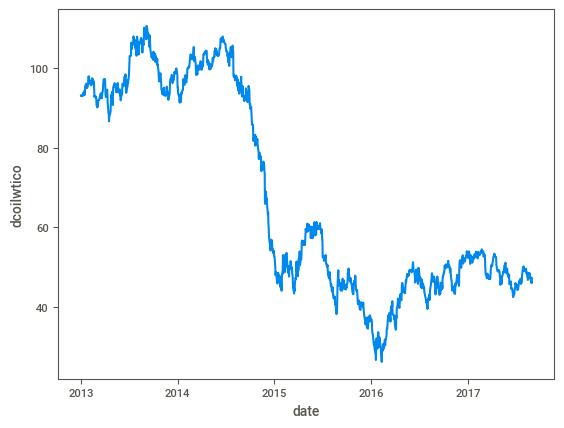

In [151]:
sns.lineplot(data=oil_df2, x=oil_df2.index, y='dcoilwtico')

2016 had the lowest oil prices. It is worthy to note that that year has the highest Sales 

In [152]:
#Determine teh correlation between sales and onpromotion
correlation = sampled_df['sales'].corr(sampled_df['dcoilwtico'])
print(correlation)

-0.07570381881997303


<AxesSubplot: xlabel='dcoilwtico', ylabel='sales'>

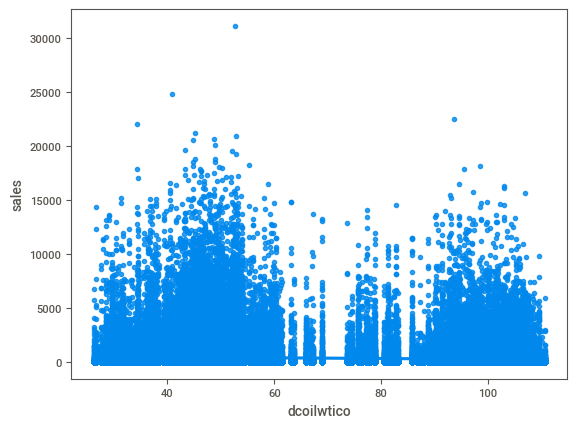

In [154]:
#import seaborn as sns

sns.regplot(x='dcoilwtico', y='sales', data=sampled_df)

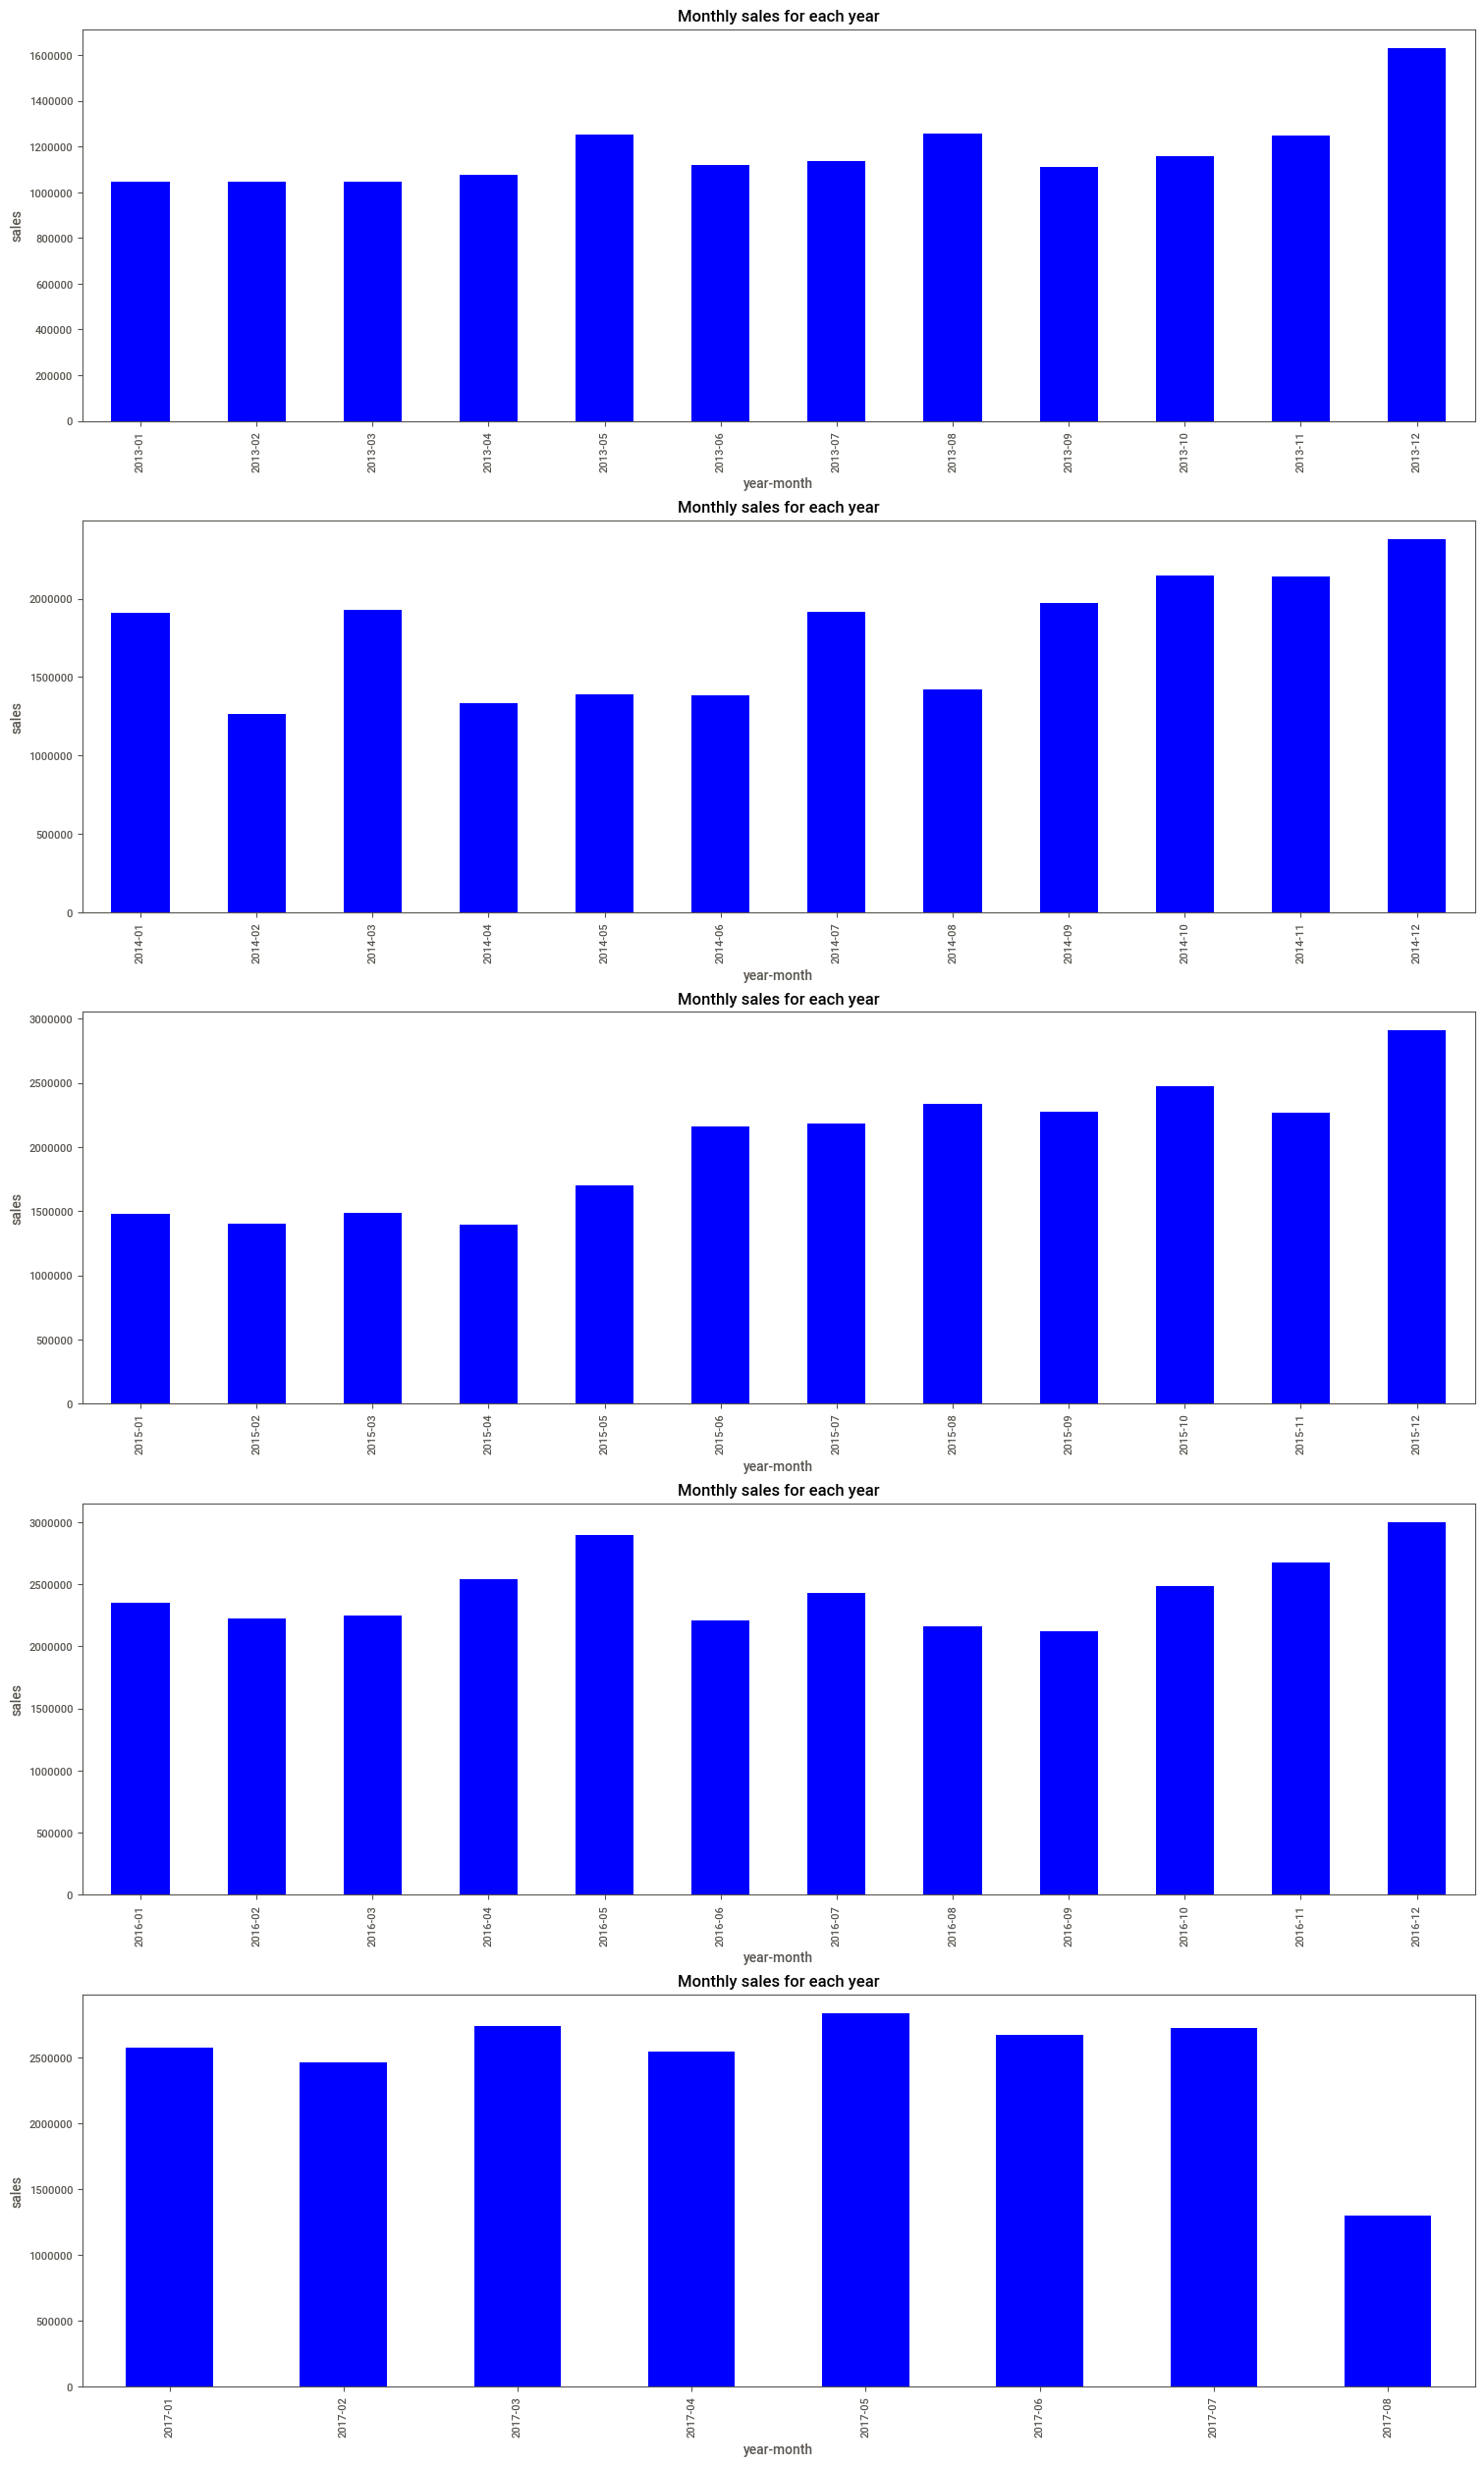

In [155]:
#Monthly sales for each year

# Create a figure with 5 rows and 1 column of subplots
fig, axs = plt.subplots(figsize=(15,25), nrows=5, ncols=1, constrained_layout=True)

sampled_df['year_month'] = sampled_df.index.to_period("M")

# Get unique years
years = sampled_df.Year.unique()

# Iterate through years
for i, year in enumerate(years):
    data = sampled_df[sampled_df.Year == year]
    ax = axs[i]
    data.groupby(['year_month']).sum()['sales'].plot.bar(ax=ax, title=f"{year}",color='blue',linewidth=3)
    ax.set_title('Monthly sales for each year')
    ax.set_xlabel("year-month")
    ax.set_ylabel("sales")
plt.show()


There is a flactuation in Sales during the year 

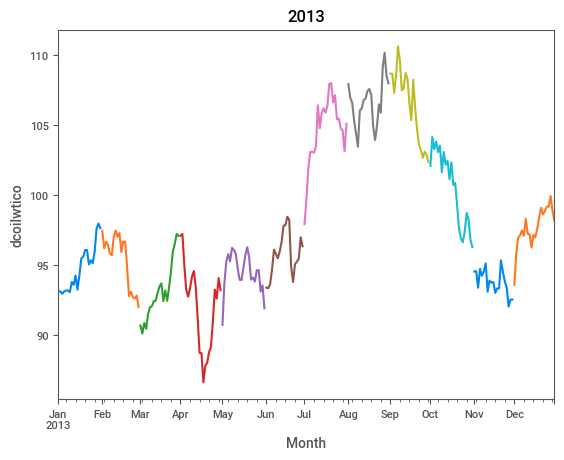

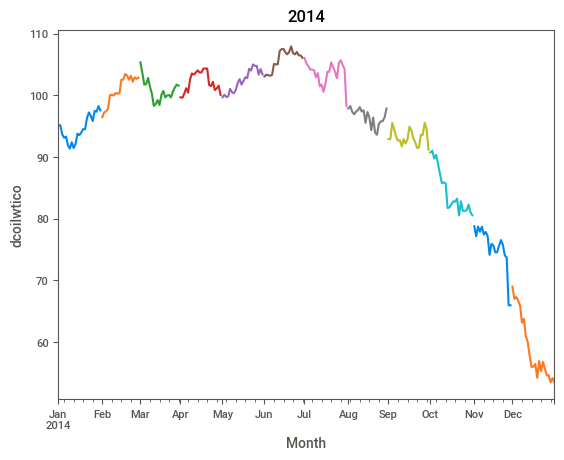

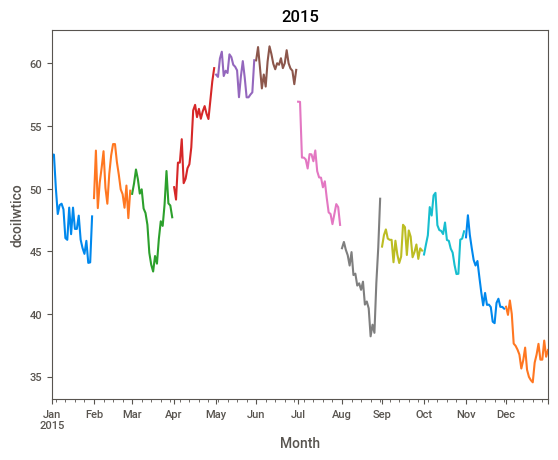

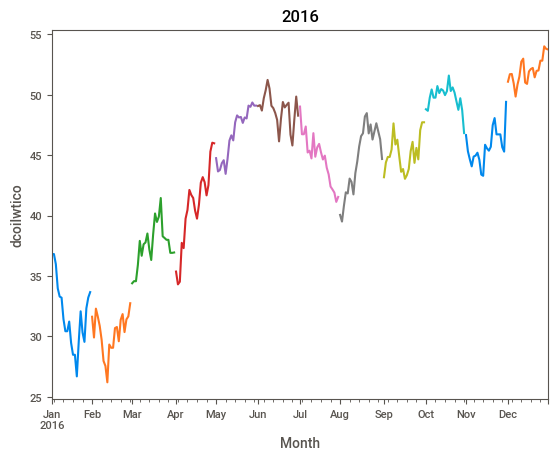

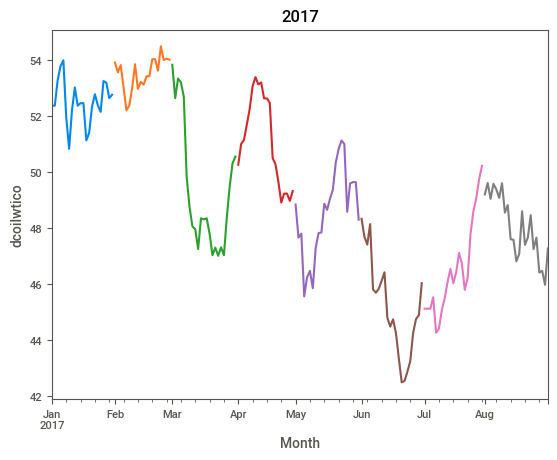

In [156]:
# Plot of dcoilwtico per year 

oil_df2['year'] = oil_df2.index.year
oil_df2['Month'] = oil_df2.index.month_name()
oil_df2['Weekday_Name'] = oil_df2.index.day_name()

years = oil_df2['year'].unique()

for year in years:
    year_df = oil_df2[oil_df2['year'] == year]
    year_df.groupby(year_df.index.month)['dcoilwtico'].plot()
    plt.title(year)
    plt.xlabel('Month')
    plt.ylabel('dcoilwtico')
    plt.show()


Holiday

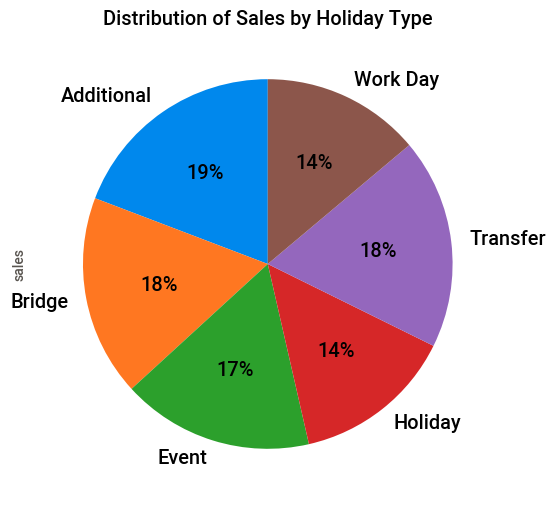

In [159]:
#Distribution of Sales by Holiday Type


#Merge the sales data with holiday data
Train_Holiday_df2 = pd.merge(train_df,holidays_df,how="left",on="date")

#Fill missing holiday type values with 'Work Day'
Train_Holiday_df2.type.fillna("Work Day",inplace=True)

#Group the data by holiday type and calculate the average sales for each type
avg_sales_by_type = Train_Holiday_df2.groupby("type").agg({"sales":"mean"})

#Create a figure and axis object
fig, ax = plt.subplots(figsize=(12,6))

#Plot a pie chart of the average sales by holiday type
avg_sales_by_type.plot.pie(y="sales",ax=ax, legend=False, autopct='%1.f%%',
startangle=90, labels=list(avg_sales_by_type.index.values), fontsize="x-large")

#Add a title
ax.set_title("Distribution of Sales by Holiday Type", fontsize="x-large")

#Display the plot
plt.show()


### QUESTION 6

### What analysis can we get from the date and its extractable features?

Sales Analysis with Time

In [160]:
# Group data by date and sum sales
sales_grouped  = merged_df.groupby('date').agg({'sales':'sum'}).to_period("D")

# Create new columns with year, quarter, month, week, day of week, day of month, and day of year
sales_grouped['year'] = sales_grouped.index.year
sales_grouped['quarter'] = sales_grouped.index.quarter
sales_grouped['month'] = sales_grouped.index.month
sales_grouped['week'] = sales_grouped.index.week
sales_grouped['dayofweek'] = sales_grouped.index.dayofweek
sales_grouped['dayofmonth'] = sales_grouped.index.day
sales_grouped['dayofyear'] = sales_grouped.index.dayofyear

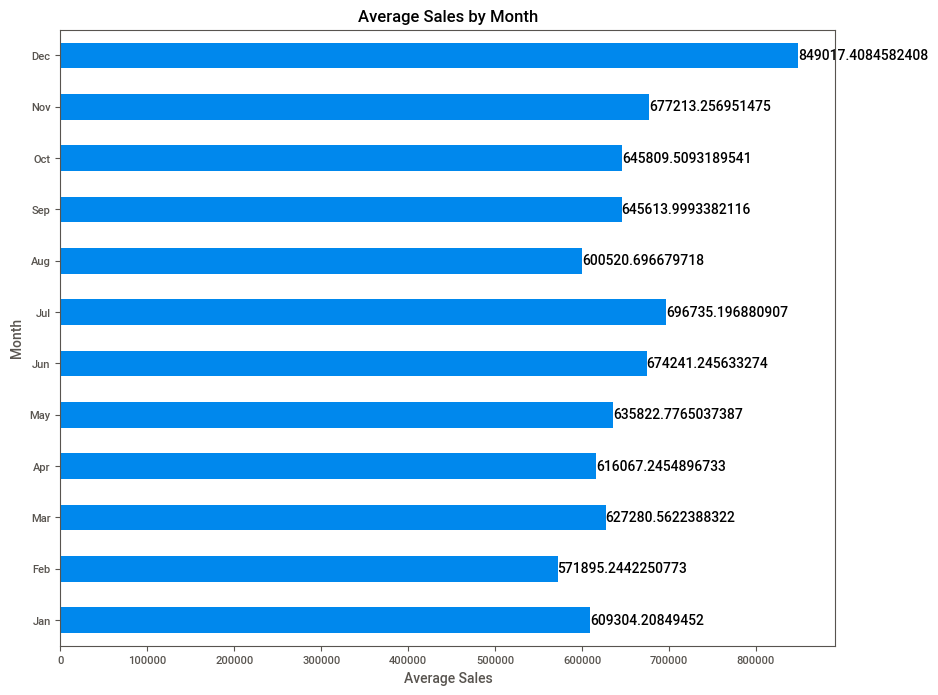

In [161]:
#Average Sales by Month

# Plotting the average sales per month
fig, ax1 = plt.subplots(figsize = (10,8)) # Creating a subplot with specified size

sales_g = sales_grouped.groupby(['month']).agg({'sales':'mean'})
sales_g.plot(kind="barh",ax=ax1) # Grouping the sales data by month and plotting the mean sales in bar format

ax1.set(title="Average Sales by Month") # Setting the title of the plot

ax1.set(ylabel="Month", xlabel="Average Sales") # Labeling the y and x axis

ax1.get_legend().remove() # Removing the legend

labels1 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # Defining the month labels

ax1.set_yticks(range(0,12)) # Setting the tick positions on the y axis

ax1.set_yticklabels(labels1) # Setting the tick labels on the y axis

for i, sales in enumerate(sales_g['sales']):
    plt.text(sales, i, str(sales), color='black', va='center')

<Figure size 1500x500 with 0 Axes>

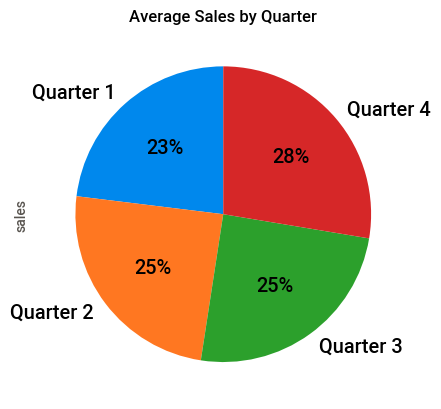

In [162]:
#Average Sales per Quarter 

plt.figure(figsize=(15, 5))
sales_grouped.groupby(['quarter']).agg({'sales':'mean'}).plot.pie(y='sales', legend=False, autopct='%1.f%%', startangle=90, labels=["Quarter 1","Quarter 2","Quarter 3","Quarter 4"], fontsize="x-large")
plt.title("Average Sales by Quarter")
plt.show()

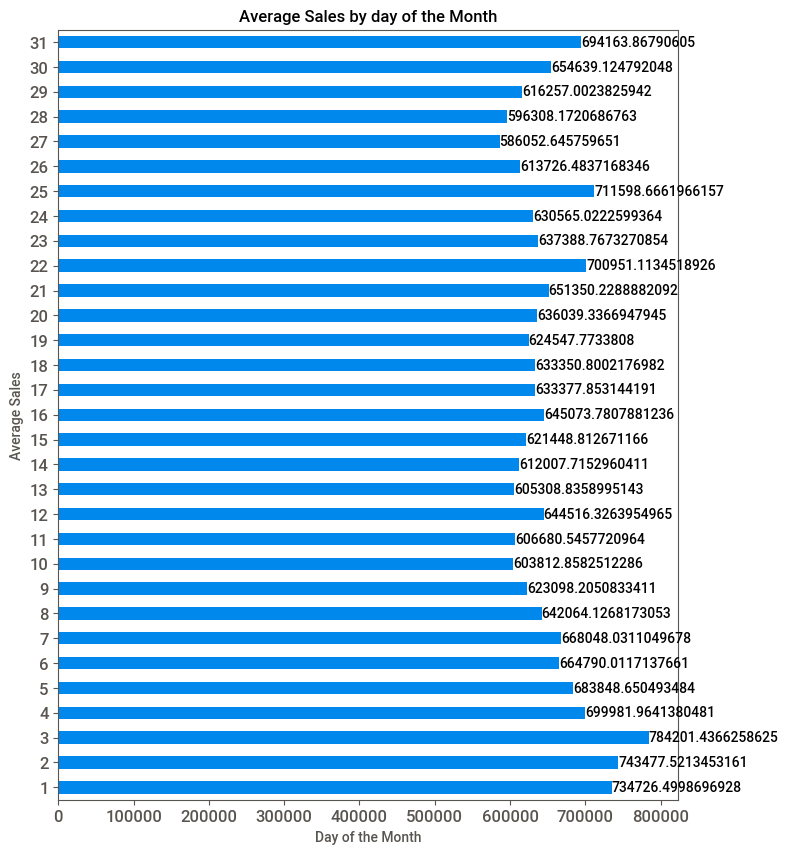

In [163]:
#Average Sales by day of the Month

fig,ax1 = plt.subplots(figsize=(8,10))
sales_grouped = sales_grouped.groupby(['dayofmonth']).agg({'sales':'mean'})
sales_grouped.plot.barh(ax=ax1,  fontsize="large")
ax1.set(title="Average Sales by day of the Month")
ax1.set(ylabel="Average Sales", xlabel="Day of the Month")
ax1.get_legend().remove()

for i, sales in enumerate(sales_grouped['sales']):
    plt.text(sales, i, str(sales), color='black', va='center')


plt.show();

The ending and the First few days of the month have some of the higest sales of the Month

A moving average is a technique to get an overall idea of the trends in a data set; it is an average of any subset of numbers. The moving average is extremely useful for forecasting long-term trends. This would help us to understand how the sales behave at different times to understand their seasonality and the overall trend. Seasonalities include each season, monthly, quarterly.

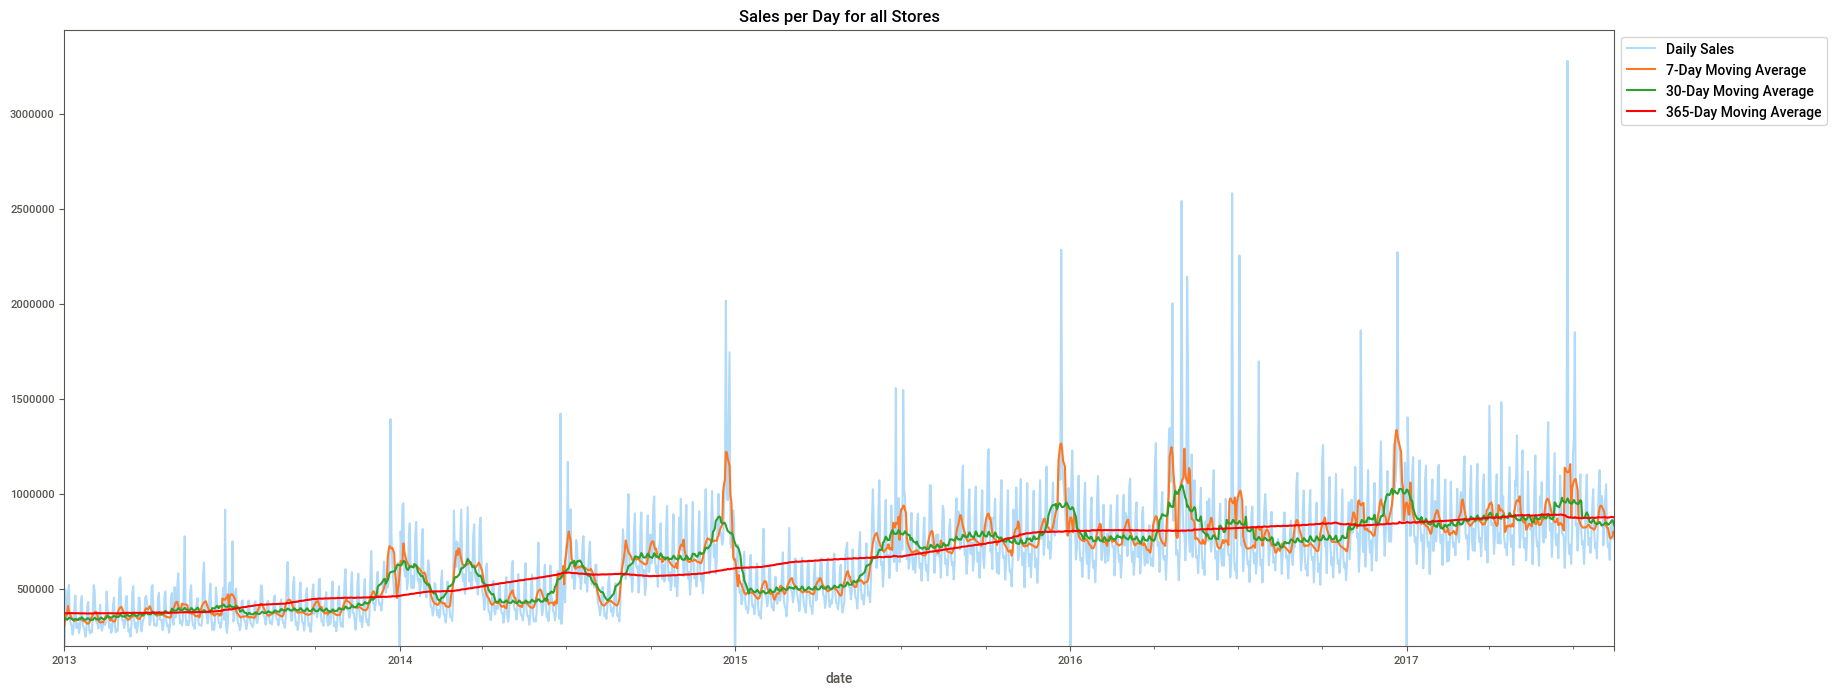

In [164]:
#Moving Average for 7-day/ 30-day / 365-Day

# Group the sales data by date and calculate the sum of sales per day
Daily_sales= merged_df.groupby('date').agg({'sales':'sum'}).to_period("D")

# Copy the daily sales data into three different variables to apply different smoothing windows on them
Daily_sales_smooth7 = Daily_sales.copy()
Daily_sales_smooth30 = Daily_sales.copy()
Daily_sales_smooth365 = Daily_sales.copy()

# Apply 7-day moving average smoothing on daily sales data
Daily_sales_smooth7["sales"] = Daily_sales_smooth7.sales.rolling(window=7, center=True, min_periods=1).mean()

# Apply 30-day moving average smoothing on daily sales data
Daily_sales_smooth30["sales"] = Daily_sales_smooth30.sales.rolling(window=30, center=True, min_periods=3).mean()

# Apply 365-day moving average smoothing on daily sales data
Daily_sales_smooth365["sales"] = Daily_sales_smooth365.sales.rolling(window=365, center=True, min_periods=6).mean()

# Create a figure with specified size and axis
figsize = (20,8)
fig, ax = plt.subplots(figsize=figsize)

# Plot the daily sales, 7-day moving average, 30-day moving average, and 365-day moving average
Daily_sales.plot(ax=ax, alpha=0.3)
Daily_sales_smooth7.plot(ax=ax)
Daily_sales_smooth30.plot(ax=ax)
Daily_sales_smooth365.plot(ax=ax, color="r")

# Add a legend to the plot
ax.legend(["Daily Sales","7-Day Moving Average","30-Day Moving Average","365-Day Moving Average"],bbox_to_anchor=(1.0, 1.0))

# Add the title and y-axis limit to the plot
ax.set(ylim=2e5, title="Sales per Day for all Stores")

# Show the plot
plt.show()


Since the sales have been increasing significantly over multiple years, then a rising trend in the moving average plots is expected. The trend is most visible in the 365-day moving average plot, as it smooths out the fluctuations over a year, and provides a better representation of the long-term trend in the data.

The 7-day and 30-day moving average plots also show a similar rising trend with strong seasonality.

Overall, the strong increasing trend in the moving average plots indicate that the sales are growing at a healthy rate, and thats a positive signal for the business.

Transaction Analysis 

In [167]:
store_sales= train_df.groupby(["date", "store_nbr"]).agg({'sales':'sum'}).reset_index()
#store_sales = Train_df.groupby(["date", "store_nbr"]).sales.sum().reset_index()

trans_df = pd.merge(store_sales,transaction_df,how = "left",on=["date","store_nbr"])

In [168]:
trans_df.sample(5)

date  store_nbr         sales  transactions
37724 2014-12-01         33  12696.866000        1244.0
75023 2016-10-24         18      0.000000           NaN
13792 2013-09-13         23   4600.915002        1195.0
26695 2014-05-11         20      0.000000           NaN
90719 2017-08-11         54   8513.834000         768.0

In [169]:
trans_df.isnull().sum()

date               0
store_nbr          0
sales              0
transactions    7448
dtype: int64

In [171]:
#Replace missing values 

trans_df["transactions"].bfill(inplace=True)

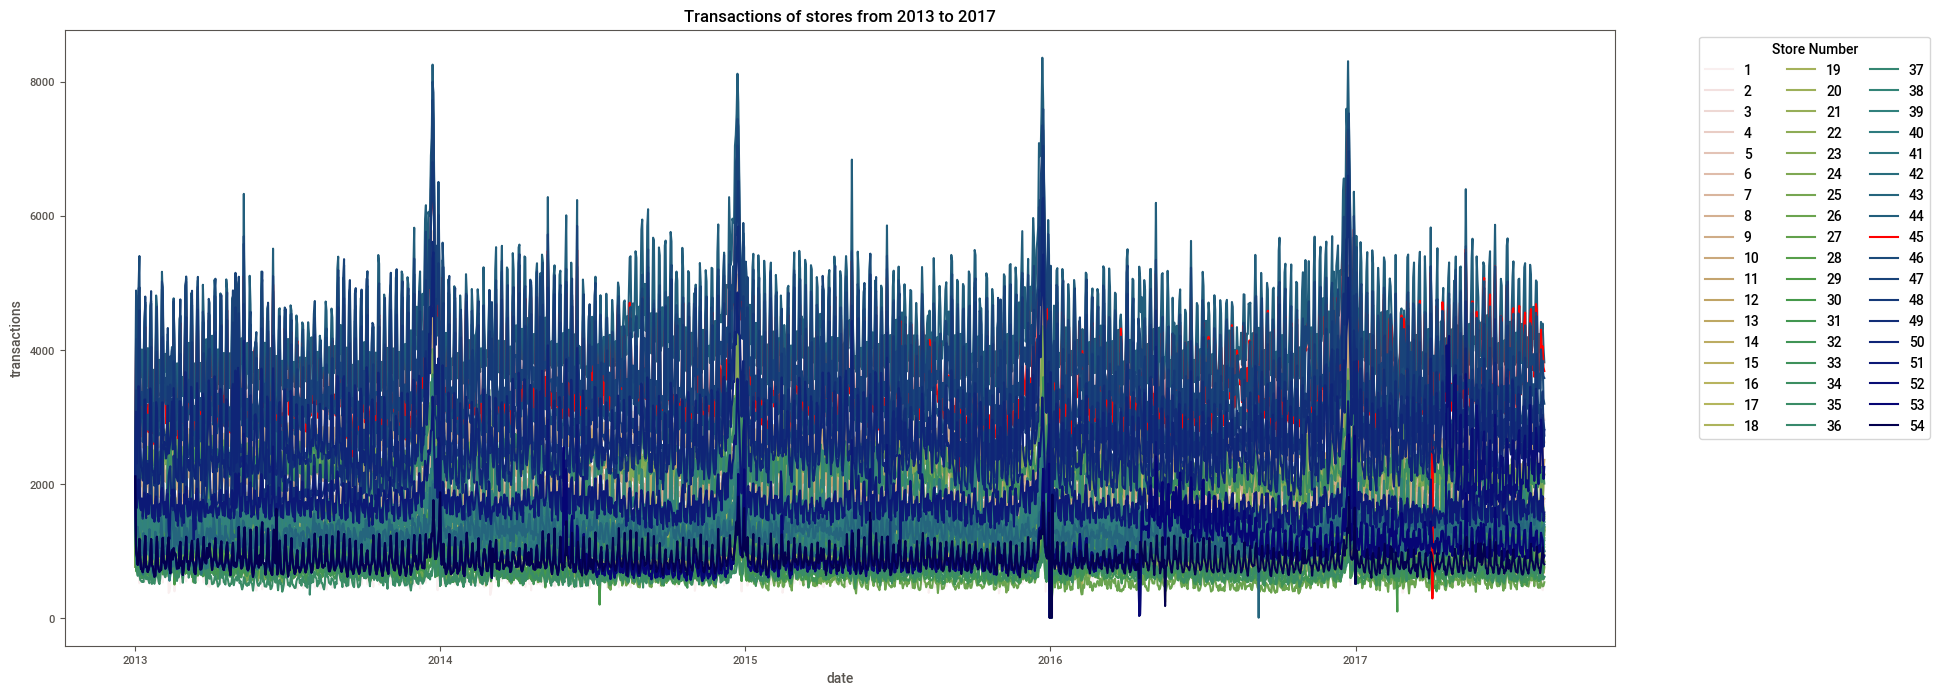

In [172]:
# Find the store with the highest total transactions

highest_trans_store = trans_df.groupby(by='store_nbr').agg({'transactions':'sum'}).sort_values(by='transactions',ascending=False).index[0]

figsize = (20,8)
fig, ax = plt.subplots(figsize=figsize)

# Create a custom color palette
custom_palette = sns.color_palette("gist_earth_r", n_colors=trans_df.store_nbr.nunique())

custom_palette[highest_trans_store] = 'r' # change the color of the highest transaction store to red

# Use the custom palette in the lineplot
sns.lineplot(data=trans_df, x='date', y='transactions', hue='store_nbr', ax=ax, palette=custom_palette)
ax.set(title="Transactions of stores from 2013 to 2017")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=3,title="Store Number")
plt.show();


- There is a stable pattern in transactions over the years. They are peaking at december similar to sales 

In [173]:
trans_df["year"] = trans_df.date.dt.year
trans_df["month"] = trans_df.date.dt.month

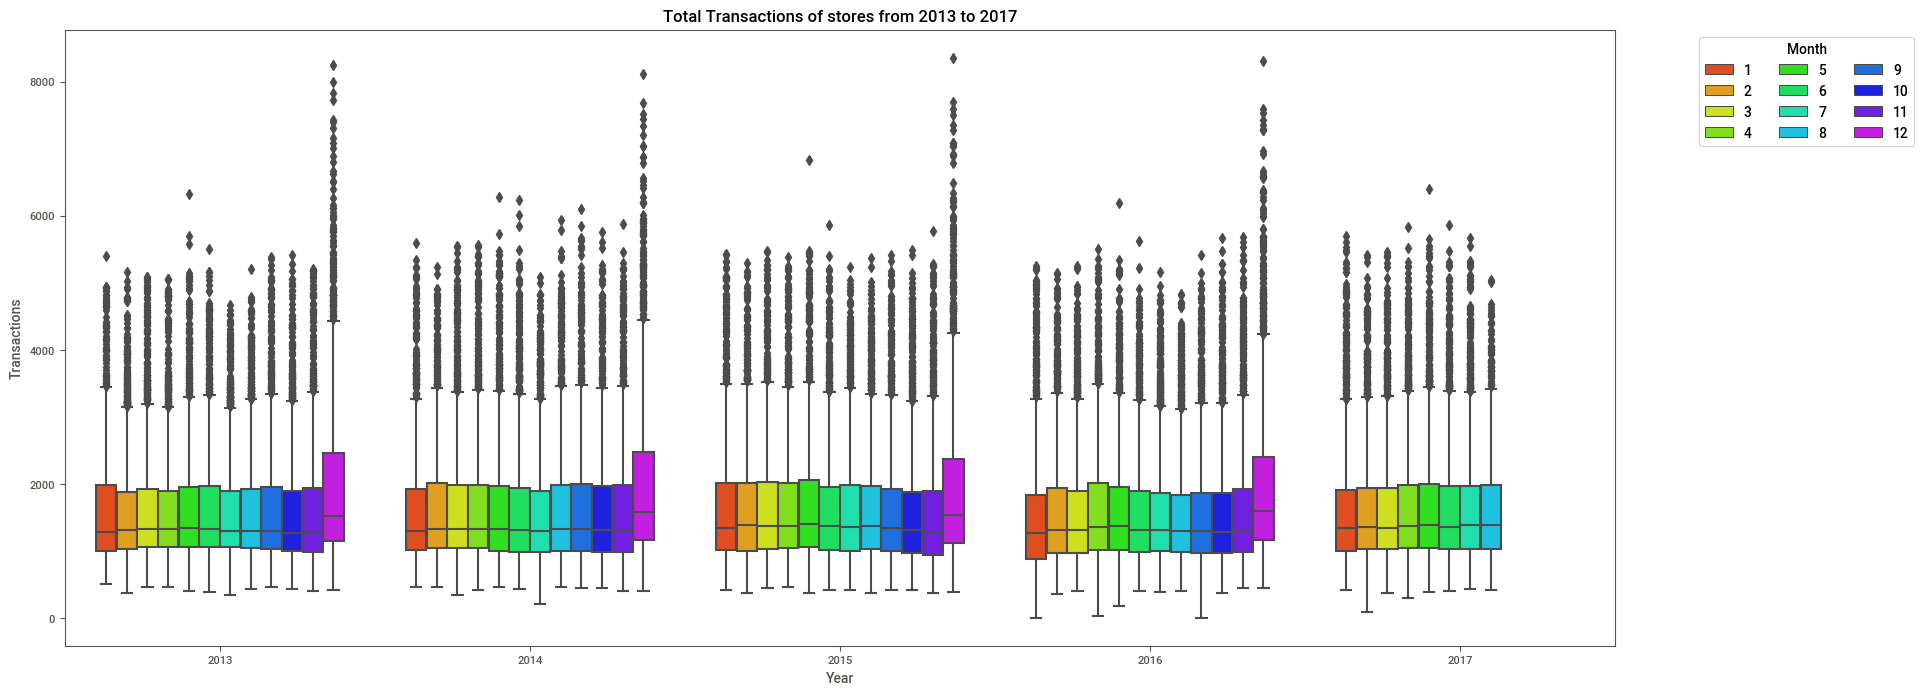

In [174]:
#Total Transactions of stores from 2013 to 2017. Outlier Analysis 

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=trans_df, x='year', y='transactions', hue='month', ax=ax, palette=sns.color_palette("gist_rainbow", n_colors=trans_df.month.nunique()))
ax.set(title="Total Transactions of stores from 2013 to 2017")
ax.set_xlabel("Year")
ax.set_ylabel("Transactions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=3,title="Month")
plt.show()

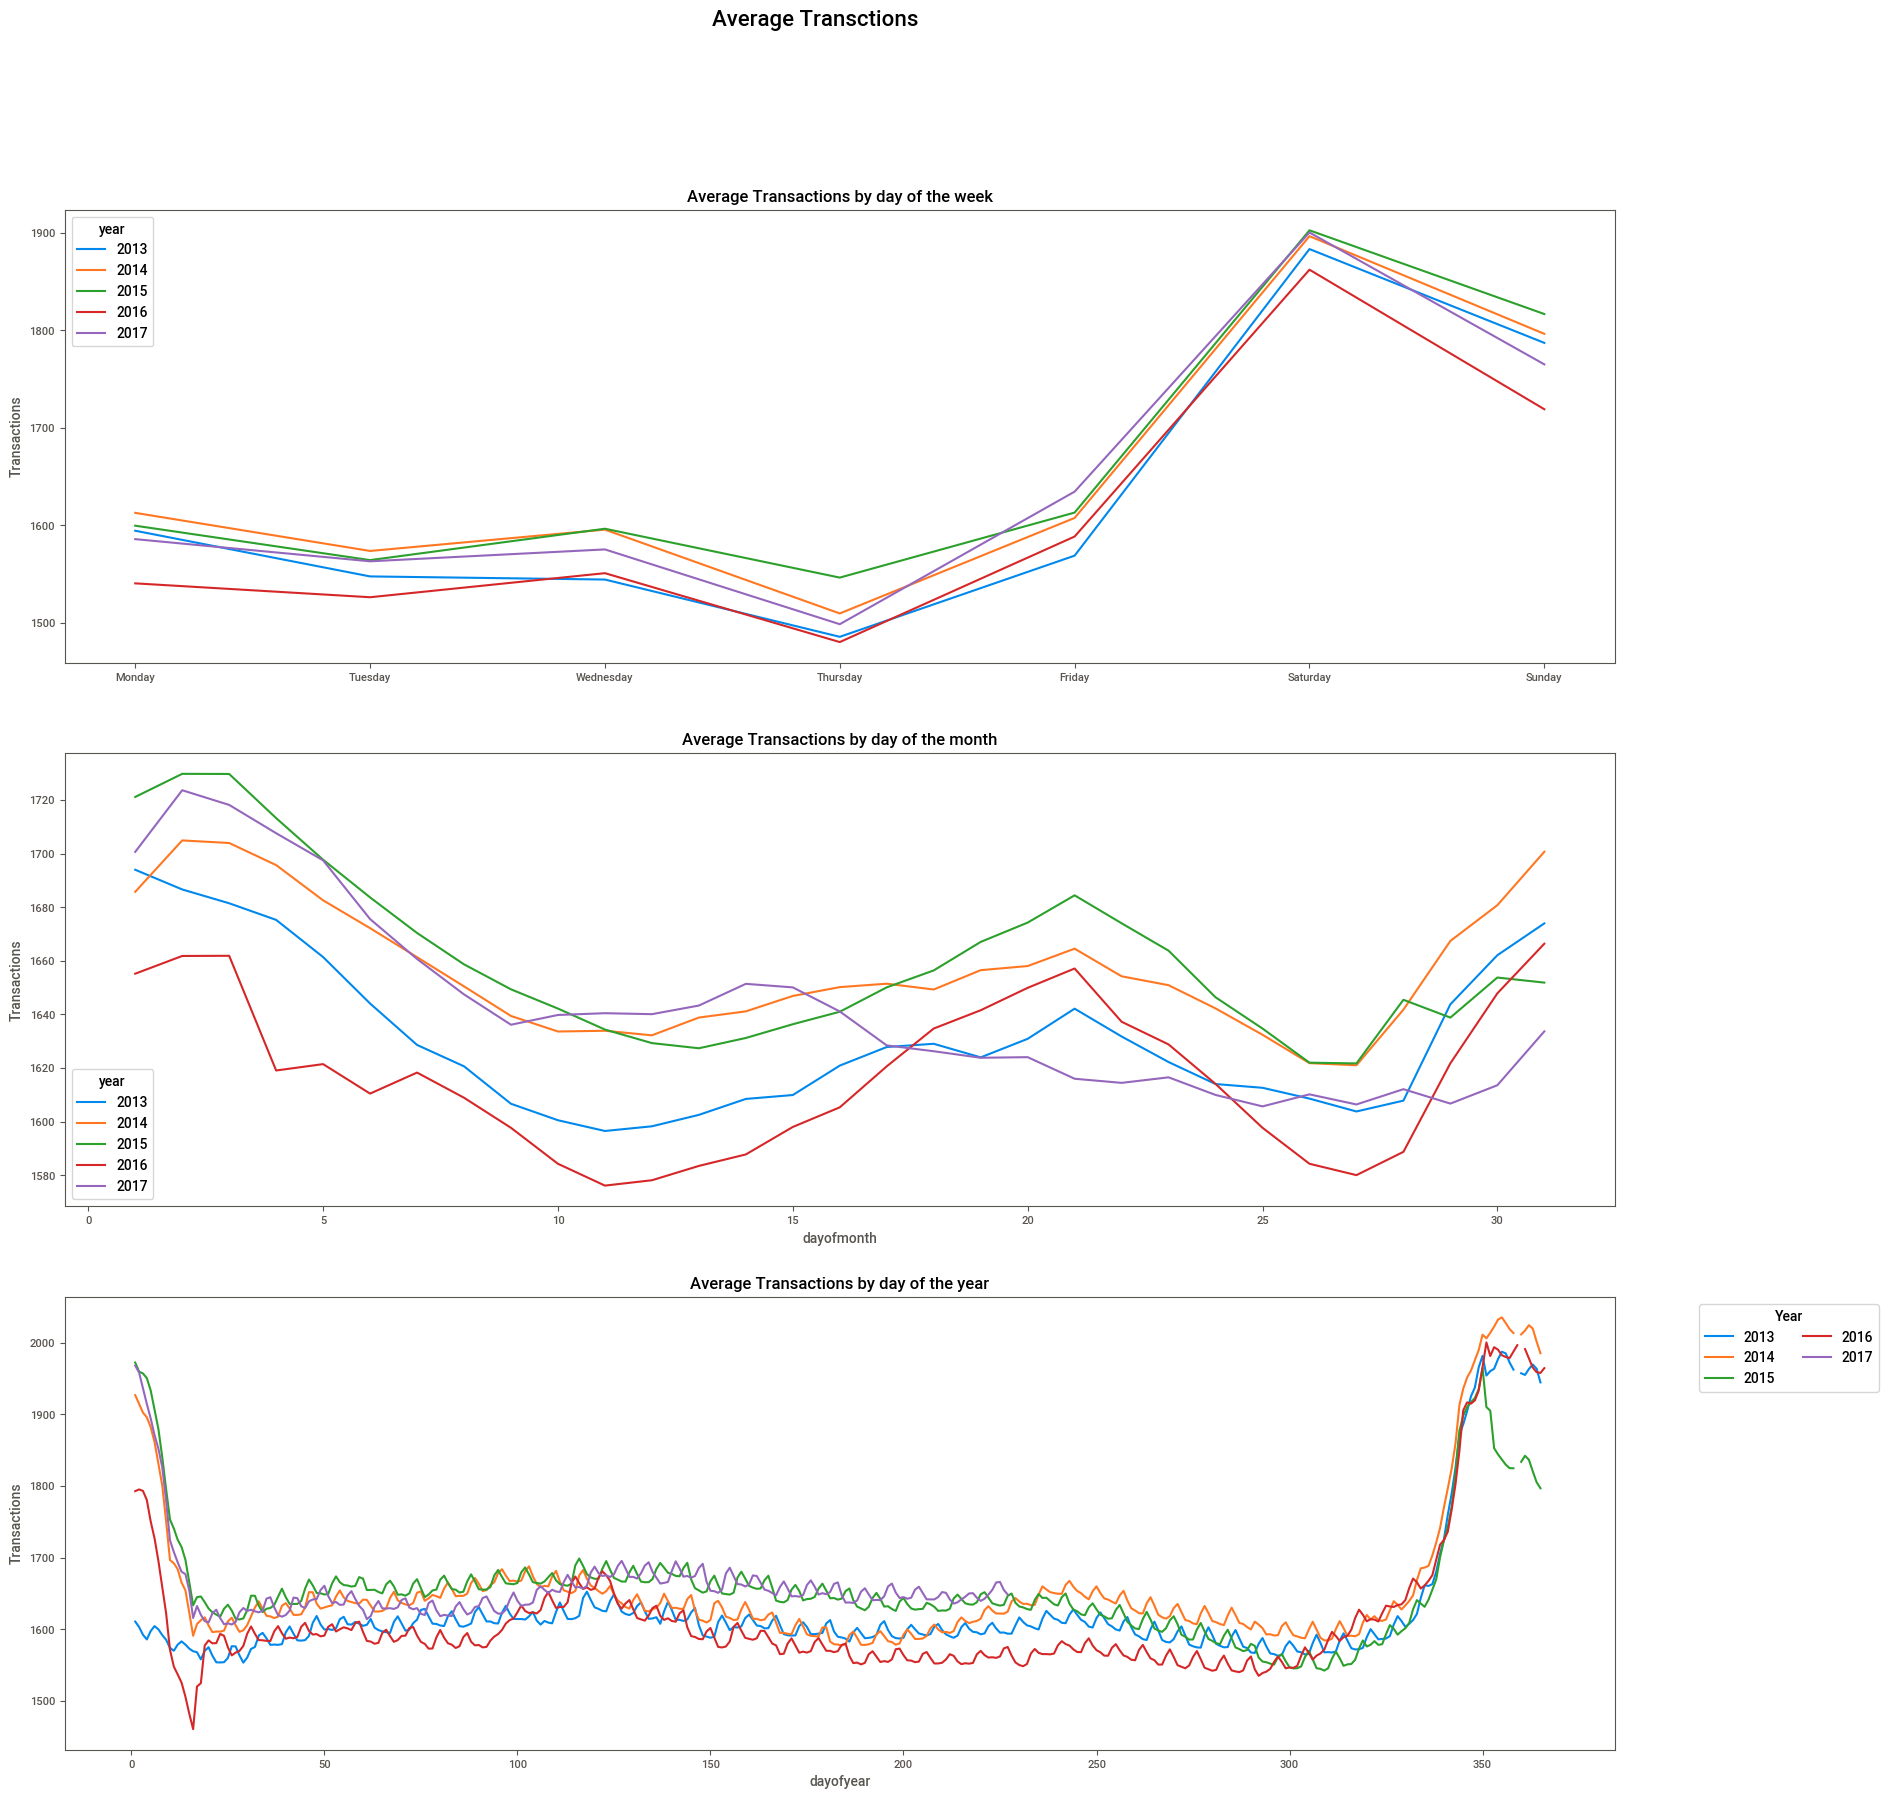

In [175]:
#Further Analysis of Transaction column 

trans_df["dayofweek"] = trans_df.date.dt.dayofweek
trans_df["dayofmonth"] = trans_df.date.dt.day
trans_df["dayofyear"] = trans_df.date.dt.dayofyear
week_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
month_list = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Set figure size
figsize = (20,20)

# Create 3 subplots with 1 column and 3 rows
fig, (ax1,ax2,ax3) = plt.subplots(ncols=1,nrows=3,figsize=figsize)

# Create new columns for day of week, day of month and day of year
trans_df["dayofweek"] = trans_df.date.dt.dayofweek
trans_df["dayofmonth"] = trans_df.date.dt.day
trans_df["dayofyear"] = trans_df.date.dt.dayofyear

# Calculate mean transactions by day of week, year
week_data = trans_df.groupby(by=["year","dayofweek"]).agg({"transactions":"mean"}).reset_index()
week_data = pd.pivot(data=week_data,index="dayofweek",values="transactions",columns="year")
week_data.index = week_list
week_data.plot(ax=ax1)

# Set y-axis label and title for first subplot
ax1.set_ylabel("Transactions")
ax1.set(title="Average Transactions by day of the week")

# Calculate mean transactions by day of month, year and apply 7-day rolling mean
month_data = trans_df.groupby(by=["year","dayofmonth"]).agg({"transactions":"mean"}).reset_index()
month_data["transactions"] = month_data["transactions"].rolling(window=7,center=True,min_periods=3).mean()
month_data = pd.pivot(data=month_data,index="dayofmonth",values="transactions",columns="year")
month_data.plot(ax=ax2)

# Set y-axis label and title for second subplot
ax2.set_ylabel("Transactions")
ax2.set(title="Average Transactions by day of the month")

# Calculate mean transactions by day of year, year and apply 30-day rolling mean
year_data = trans_df.groupby(by=["year","dayofyear"]).agg({"transactions":"mean"}).reset_index().sort_values(by=["year","dayofyear"])
year_data["transactions"] = year_data["transactions"].rolling(window=30,center=True,min_periods=15).mean()
year_data = pd.pivot(data=year_data,index="dayofyear",values="transactions",columns="year")
year_data.plot(ax=ax3)

# Set y-axis label and title for third subplot
ax3.set_ylabel("Transactions")
ax3.set(title="Average Transactions by day of the year")

# Set overall title for the figure
fig.suptitle("Average Transctions",fontsize=16,fontweight="bold")

# Add legend with 2 columns and located at upper left corner
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=2,title="Year")

# Display the figure
plt.show();

For Average Transactions by day of the week: We observe that theres an increase between Thursday and Saturday and a sudden drop in the number of transactions on Sunday

for Average Transactions by day of the month: Theres a consistent reduction in transaction from the 1st to the 19th. The 20th saw a rise in avaerage transaction and then a drop again before another increase by the 30th. Theres some interesting fluctuations which could be caused by several combination of factors.

For the Average Transactions by day of the year: December and January always sees a shart increase in transcations which corresponds to increase in sales.

Oil Analysis with Time 

In [177]:
# Merge the sum of sales from Train_df with oil price data from oil_df
sales_data = pd.merge(train_df.groupby("date").agg({"sales":"sum"}),oil_df,on="date",how="left")

# Merge the sum of transactions from Transaction_df with the previously merged data
sales_data = pd.merge(sales_data,transaction_df.groupby(by="date").agg({"transactions":"sum"}),
                      on="date",how="left").set_index("date")

In [178]:
sales_data.head()

sales  dcoilwtico  transactions
date                                               
2013-01-01    2511.618999       93.14         770.0
2013-01-02  496092.417944       93.14       93215.0
2013-01-03  361461.231124       92.97       78504.0
2013-01-04  354459.677093       93.12       78494.0
2013-01-05  477350.121229         NaN       93573.0

In [179]:
sales_data.isnull().sum()

sales             0
dcoilwtico      481
transactions      2
dtype: int64

In [180]:
# Fill missing oil price data with the last known value
sales_data["dcoilwtico"].bfill(inplace=True)
sales_data["transactions"].bfill(inplace=True)

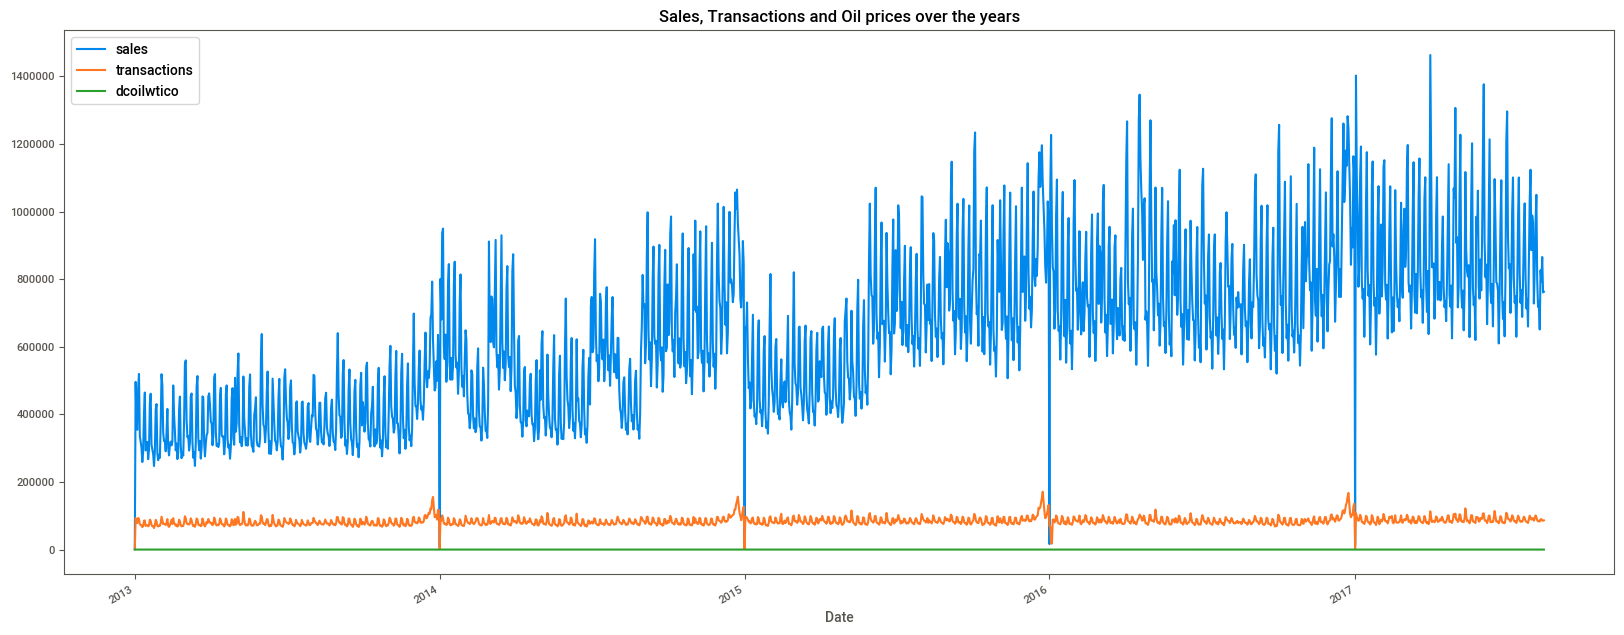

In [181]:
#Sales, Transactions and Oil prices over the years

# Create a figure and axis object
figsize=(20,8)
fig,ax = plt.subplots(figsize=figsize)

# Plot the sales, transactions and oil prices on the same axis
sales_data["sales"].plot(ax=ax)
sales_data["transactions"].plot(ax=ax)
sales_data["dcoilwtico"].plot(ax=ax)

# Add a title and x-axis label
ax.set_title("Sales, Transactions and Oil prices over the years")
ax.set_xlabel("Date")

# Add a legend
ax.legend(["sales","transactions","dcoilwtico"])

# Display the plot
fig.show()

An upward trend for sales across years is observed. Lets use log transformation to make the trend and relationship more visible.
and make it easier to identify trends and patterns 

In [182]:
#Create new column for log of sales
sales_data["log_sales"] = sales_data["sales"].apply(np.log)

# Create new column for log of transactions
sales_data["log_transactions"] = sales_data["transactions"].apply(np.log)

# Create new column for log of dcoilwtico
sales_data["log_dcoilwtico"] = sales_data["dcoilwtico"].apply(np.log)

# Display a sample of the data
sales_data.sample(5) 

sales  dcoilwtico  transactions  log_sales  \
date                                                             
2013-12-18  527481.336925       97.59      102356.0  13.175869   
2014-04-08  376663.272105      102.57       76904.0  12.839107   
2015-11-13  626674.025055       40.69       80292.0  13.348182   
2017-05-08  776307.495015       46.46       84221.0  13.562304   
2013-04-01  428816.447912       97.10       81678.0  12.968784   

            log_transactions  log_dcoilwtico  
date                                          
2013-12-18         11.536212        4.580775  
2014-04-08         11.250313        4.630545  
2015-11-13         11.293425        3.705982  
2017-05-08         11.341200        3.838592  
2013-04-01         11.310540        4.575741

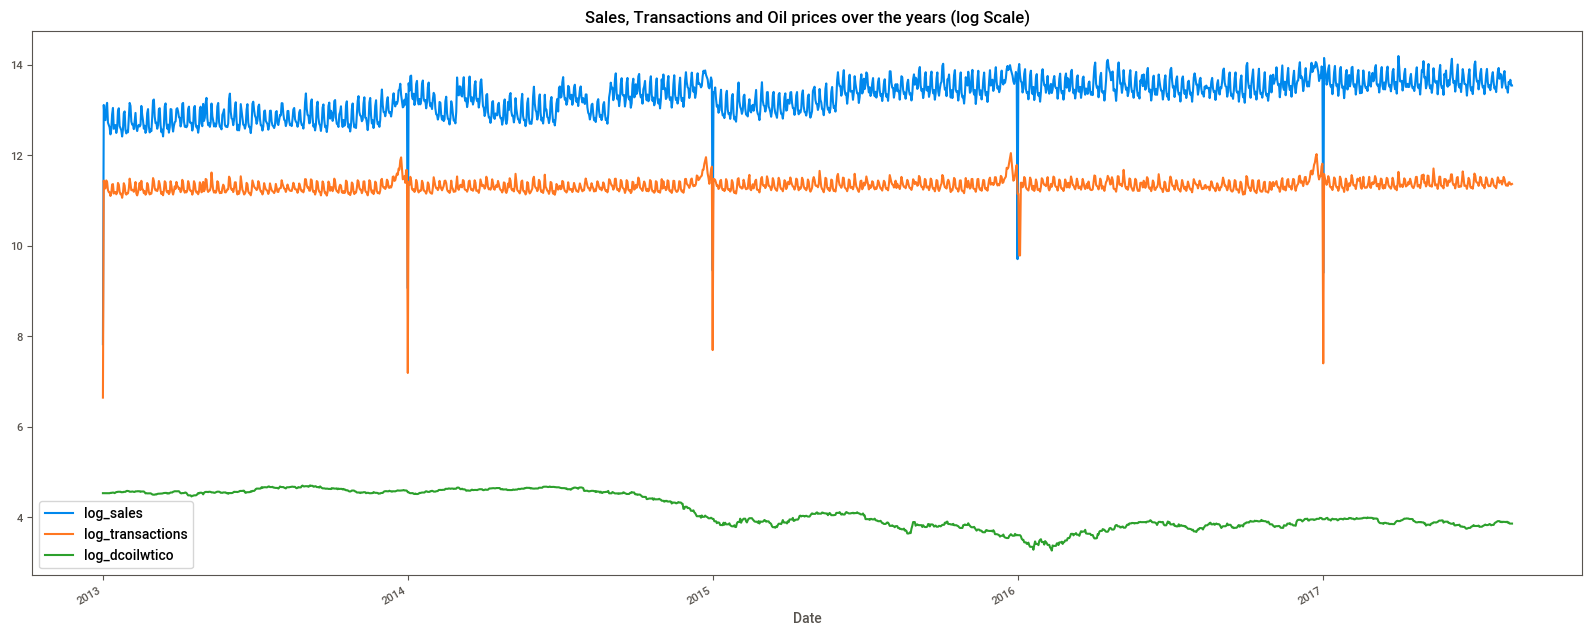

In [183]:
#Sales, Transactions and Oil prices over the years (log Scale)

# Create a figure and set its size
figsize=(20,8)
fig,ax = plt.subplots(figsize=figsize)

# Plot the log of sales, transactions, and oil prices on the same plot
sales_data["log_sales"].plot(ax=ax)
sales_data["log_transactions"].plot(ax=ax)
sales_data["log_dcoilwtico"].plot(ax=ax)

# Set the title of the plot
ax.set_title("Sales, Transactions and Oil prices over the years (log Scale)")

# Set the x-axis label
ax.set_xlabel("Date")

# Add legend to the plot
ax.legend(["log_sales","log_transactions","log_dcoilwtico"])

# Display the plot
fig.show();

# Hypothesis Testing 

NULL: There is no significant increase in sales when product-family are on promotion

Alternate: There is a significant increase in sales when products are on promotion

In [184]:
# Extract the sales of products when they are on promotion and when they are not
sales_on_promotion = merged_df[merged_df['onpromotion_encoded'] == 1]['sales']
sales_not_on_promotion = merged_df[merged_df['onpromotion_encoded'] == 0]['sales']

# Perform t-test
t_stat, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Print the t-statistic and p-value
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  745.1036104435243
p-value:  0.0


In [188]:
# Create contingency table
contingency_table = pd.crosstab(merged_df['onpromotion_encoded'], merged_df['sales'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-squared statistic: ", chi2)
print("p-value: ", p)

Chi-squared statistic:  1478150.148349317
p-value:  0.0


A p-value of 0 suggests that the null hypothesis can be rejected and that there is strong evidence of a significant difference between the groups.

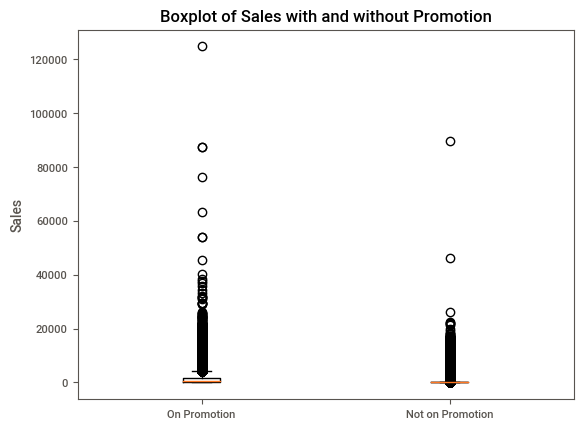

In [189]:
# Boxplot of Sales with and without Promotion

data = [sales_on_promotion, sales_not_on_promotion]
labels = ['On Promotion', 'Not on Promotion']
plt.boxplot(data, labels=labels)
plt.ylabel('Sales')
plt.title('Boxplot of Sales with and without Promotion')
plt.show()

The figure also graphically shows that on-promotion products havea high sales with significant outliers which supports the hypothesis test and results above

### We fail to accept the null hypothesis 